In [59]:
import pandas as pd
import os
import sklearn
import re
import numpy as np
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

In [105]:
from sklearn.preprocessing import MinMaxScaler

In [61]:
current_path = os.getcwd()
data_sources = os.path.join(current_path, '..', 'Data Sources')

In [62]:
#datasets we're using
real_estate = pd.read_csv(os.path.join(data_sources, 'RealEstate_Sample_Wards.csv'))
real_estate.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
real_estate['Ward_ID'] = real_estate['Ward_ID'].fillna(-1) #to fill any missing values
real_estate['Ward_ID'] = real_estate['Ward_ID'].astype(int)

In [63]:
# Summarize the dataset
print("Dataset Summary:")
print(real_estate.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(real_estate.isnull().sum())  # Check for missing values
print("\nData Types:")
print(real_estate.dtypes)  # Data types of each column

Dataset Summary:
             Geo_Id  Est_Const_Cost      Ward_ID
count  7.729000e+03    7.782000e+03  7782.000000
mean   5.544786e+06    6.142292e+06    11.706759
std    7.792298e+06    2.325983e+07     7.016796
min    1.658700e+04    5.005500e+05    -1.000000
25%    5.291640e+05    7.000000e+05     4.000000
50%    9.873240e+05    8.602450e+05    12.000000
75%    8.393480e+06    1.300000e+06    17.000000
max    3.013581e+07    6.000000e+08    24.000000

Missing Values in Each Column:
Permit_Num             0
Permit_Type            0
Structure_Type         0
Work                   0
Street_Num             0
Street_Name            0
Street_Type            0
Street_Direction       0
Postal                 0
Geo_Id                53
Ward_Grid              0
Application_Date       0
Issued_Date            0
Completed_Date      4419
Status                 0
Description            5
Est_Const_Cost         0
Address                0
Coordinates           42
Ward_ID                0
Ward      

In [64]:
transportation = pd.read_csv(os.path.join(data_sources, 'Transportation_Sample_Wards.csv'))
transportation.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
transportation['Ward_ID'] = transportation['Ward_ID'].fillna(-1)
transportation['Ward_ID'] = transportation['Ward_ID'].astype(int)

# Function to safely extract longitude and latitude from the 'Coordinates' column
def extract_longitude(x):
    if isinstance(x, str):
        match = re.findall(r"\(([^ ]+)", x)
        if match:
            return float(match[0])
    return None  # Return None or a default value if the extraction is not possible

def extract_latitude(x):
    if isinstance(x, str):
        match = re.findall(r" ([^ ]+)\)", x)
        if match:
            return float(match[0])
    return None

# Apply the functions to the 'Coordinates' column
transportation['Longitude'] = transportation['Coordinates'].apply(extract_longitude)
transportation['Latitude'] = transportation['Coordinates'].apply(extract_latitude)

In [65]:
# Summarize the dataset
print("Dataset Summary:")
print(transportation.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(transportation.isnull().sum())  # Check for missing values
print("\nData Types:")
print(transportation.dtypes)  # Data types of each column

Dataset Summary:
             Geo_Id  Est_Const_Cost     Ward_ID   Longitude    Latitude
count  3.260000e+02    3.790000e+02  379.000000  377.000000  377.000000
mean   9.514485e+06    4.381436e+06   12.759894  -79.401157   43.703741
std    5.234162e+06    1.647204e+07    8.519065    0.083659    0.121088
min    1.000000e+00    1.000000e+03   -1.000000  -79.937708   43.615934
25%    7.663876e+06    1.913775e+05    3.000000  -79.445925   43.660932
50%    9.234260e+06    7.500000e+05   12.000000  -79.401937   43.678240
75%    1.127259e+07    1.000000e+06   20.000000  -79.380073   43.732390
max    3.012227e+07    2.050000e+08   24.000000  -78.993403   45.218095

Missing Values in Each Column:
Permit_Num            0
Permit_Type           0
Structure_Type        0
Work                  0
Street_Num            0
Street_Name           0
Street_Type           0
Street_Direction      0
Postal                0
Geo_Id               53
Ward_Grid             0
Application_Date      0
Issued_Date    

In [66]:
amenities = pd.read_csv(os.path.join(data_sources, 'Amenities_Sample_Ward.csv'))
amenities.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
amenities['Ward_ID'] = amenities['Ward_ID'].fillna(-1)
amenities['Ward_ID'] = amenities['Ward_ID'].astype(int)

In [67]:
# Summarize the dataset
print("Dataset Summary:")
print(amenities.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(amenities.isnull().sum())  # Check for missing values
print("\nData Types:")
print(amenities.dtypes)  # Data types of each column

Dataset Summary:
             Geo_Id  Est_Const_Cost     Ward_ID
count  6.770000e+02    7.100000e+02  710.000000
mean   9.079769e+06    1.367497e+06   13.652113
std    7.498107e+06    8.419102e+06    8.437530
min    1.000000e+00    1.000000e+03   -1.000000
25%    2.689033e+06    5.000000e+04    5.000000
50%    8.408487e+06    1.000000e+05   15.000000
75%    1.349719e+07    3.500000e+05   21.000000
max    3.013363e+07    1.000000e+08   24.000000

Missing Values in Each Column:
Permit_Num            0
Permit_Type           0
Structure_Type        0
Work                  0
Street_Num            0
Street_Name           0
Street_Type           0
Street_Direction      0
Postal                0
Geo_Id               33
Ward_Grid             0
Application_Date      0
Issued_Date           0
Completed_Date      443
Status                0
Description           1
Est_Const_Cost        0
Address               0
Coordinates          19
Ward_ID               0
Ward                 23
dtype: int64

D

In [68]:
social_dev = pd.read_csv(os.path.join(data_sources, 'Social_Development_Sample_Wards.csv'))
social_dev.rename(columns={"Ward_Index": "Ward_ID"},inplace=True)
social_dev['Ward_ID'] = social_dev['Ward_ID'].fillna(-1)
social_dev['Ward_ID'] = social_dev['Ward_ID'].astype(int)

In [69]:
# Summarize the dataset
print("Dataset Summary:")
print(social_dev.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(social_dev.isnull().sum())  # Check for missing values
print("\nData Types:")
print(social_dev.dtypes)  # Data types of each column

Dataset Summary:
             Geo_Id  Est_Const_Cost      Ward_ID
count  3.006000e+03    3.026000e+03  3026.000000
mean   7.159955e+06    2.209746e+06    10.274289
std    6.023199e+06    2.187844e+07     7.562988
min    1.781300e+04    1.000000e+03    -1.000000
25%    8.365558e+05    6.000000e+04     3.000000
50%    7.754918e+06    1.898750e+05    10.000000
75%    9.947932e+06    5.768968e+05    17.000000
max    3.012356e+07    7.650000e+08    24.000000

Missing Values in Each Column:
Permit_Num             0
Permit_Type            0
Structure_Type         0
Work                   0
Street_Num             0
Street_Name            0
Street_Type            0
Street_Direction       0
Postal                 0
Geo_Id                20
Ward_Grid              0
Application_Date       0
Issued_Date            0
Completed_Date      1829
Status                 0
Description            2
Est_Const_Cost         0
Address                0
Coordinates           11
Ward_ID                0
Ward      

In [70]:
#data cleaning from Phase 2
education_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(833),
    nrows=16,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
education_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(978),
    nrows=17,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# rename 'Education' column to 'Education_Level' before melting
education_data2016.rename(columns={"Education": "Education_Level"}, inplace=True)
education_data2021.rename(columns={"Education": "Education_Level"}, inplace=True)

# filter out rows where 'Education_Level' column is not empty
education_data2016 = education_data2016[education_data2016["Education_Level"].notna()]
education_data2021 = education_data2021[education_data2021["Education_Level"].notna()]

# remove all spaces in education_level column
education_data2016["Education_Level"] = education_data2016[
    "Education_Level"
].str.strip()
education_data2021["Education_Level"] = education_data2021[
    "Education_Level"
].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Education_Level', and 'Population' columns
education_data2016 = pd.melt(
    education_data2016,
    id_vars=["Education_Level"],
    var_name="Ward_ID",
    value_name="Population",
)
education_data2016["Year"] = 2016
education_data2021 = pd.melt(
    education_data2021,
    id_vars=["Education_Level"],
    var_name="Ward_ID",
    value_name="Population",
)
education_data2021["Year"] = 2021

# merge the datasets
Education = pd.concat(
    [education_data2016, education_data2021], ignore_index=True
)

# change data types
Education["Population"] = Education["Population"].astype(int)
Education["Education_Level"] = Education["Education_Level"].astype(
    str
)

In [71]:
# Summarize the dataset
print("Dataset Summary:")
print(Education.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Education.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Education.dtypes)  # Data types of each column

Dataset Summary:
         Population         Year
count  8.060000e+02   806.000000
mean   3.642121e+04  2018.580645
std    1.516853e+05     2.500250
min    2.100000e+02  2016.000000
25%    2.180000e+03  2016.000000
50%    1.053750e+04  2021.000000
75%    2.525125e+04  2021.000000
max    2.377950e+06  2021.000000

Missing Values in Each Column:
Education_Level    0
Ward_ID            0
Population         0
Year               0
dtype: int64

Data Types:
Education_Level    object
Ward_ID            object
Population          int64
Year                int64
dtype: object


In [72]:
# INDUSTRY DIMENSION
industry_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(1176),
    nrows=22,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
industry_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(1310),
    nrows=22,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Industry' column is not empty
industry_data2016 = industry_data2016[industry_data2016["Industry"].notna()]
industry_data2021 = industry_data2021[industry_data2021["Industry"].notna()]

# Removing the numbers and spaces before each industry type
industry_data2016["Industry"] = industry_data2016["Industry"].str.strip()
industry_data2021["Industry"] = industry_data2021["Industry"].str.strip()
industry_data2016["Industry"] = industry_data2016["Industry"].str.replace(
    r"^\s*\d+(-\d+)?\s+", "", regex=True
)
industry_data2021["Industry"] = industry_data2021["Industry"].str.replace(
    r"^\s*\d+(-\d+)?\s+", "", regex=True
)

# Melt the DataFrame to get 'Ward_ID', 'Industry', and 'Population' columns
industry_data2016 = pd.melt(
    industry_data2016, id_vars=["Industry"], var_name="Ward_ID", value_name="Population"
)
industry_data2016["Year"] = 2016
industry_data2021 = pd.melt(
    industry_data2021, id_vars=["Industry"], var_name="Ward_ID", value_name="Population"
)
industry_data2021["Year"] = 2021

# merge the datasets
Industry = pd.concat([industry_data2016, industry_data2021], ignore_index=True)

# change data types
Industry["Population"] = Industry["Population"].astype(int)
Industry["Ward_ID"] = Industry["Ward_ID"].astype(str)
Industry["Industry"] = Industry["Industry"].astype(str)

In [73]:
# Summarize the dataset
print("Dataset Summary:")
print(Industry.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Industry.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Industry.dtypes)  # Data types of each column

Dataset Summary:
         Population         Year
count  1.092000e+03  1092.000000
mean   1.062694e+04  2018.500000
std    6.486832e+04     2.501145
min    2.000000e+01  2016.000000
25%    1.337500e+03  2016.000000
50%    2.652500e+03  2018.500000
75%    5.080000e+03  2021.000000
max    1.463585e+06  2021.000000

Missing Values in Each Column:
Industry      0
Ward_ID       0
Population    0
Year          0
dtype: int64

Data Types:
Industry      object
Ward_ID       object
Population     int64
Year           int64
dtype: object


In [74]:
# INCOME DIMENSION
income_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(1252),
    nrows=17,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
income_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(1389),
    nrows=17,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Income' column is not NA
income_data2016 = income_data2016[income_data2016["Income"].notna()]
income_data2021 = income_data2021[income_data2021["Income"].notna()]

# change value of one of income ranges
income_data2016.loc[
    income_data2016["Income"].str.contains("Total - Total income groups"), "Income"
] = "Total Income Groups"
income_data2021.loc[
    income_data2021["Income"].str.contains("Total - Total Income groups"), "Income"
] = "Total Income Groups"

# Removing the spaces before each income
income_data2016["Income"] = income_data2016["Income"].str.strip()
income_data2021["Income"] = income_data2021["Income"].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Income', and 'Population' columns
income_data2016["Year"] = 2016
income_data2021["Year"] = 2021
income_data2016 = pd.melt(
    income_data2016,
    id_vars=["Income", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
income_data2021 = pd.melt(
    income_data2021,
    id_vars=["Income", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
columns_order = [col for col in income_data2016.columns if col != "Year"] + ["Year"]
income_data2016 = income_data2016[columns_order]
income_data2021 = income_data2021[columns_order]

# merge the datasets
Income = pd.concat([income_data2016, income_data2021], ignore_index=True)

# change data types
Income["Population"] = Income["Population"].astype(int)
Income["Ward_ID"] = Income["Ward_ID"].astype(str)
Income["Income"] = Income["Income"].astype(str)

In [75]:
# Summarize the dataset
print("Dataset Summary:")
print(Income.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Income.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Income.dtypes)  # Data types of each column

Dataset Summary:
         Population         Year
count  8.320000e+02   832.000000
mean   3.441147e+04  2018.500000
std    1.627281e+05     2.501504
min    2.150000e+02  2016.000000
25%    4.183750e+03  2016.000000
50%    7.730000e+03  2018.500000
75%    1.389500e+04  2021.000000
max    2.377945e+06  2021.000000

Missing Values in Each Column:
Income        0
Ward_ID       0
Population    0
Year          0
dtype: int64

Data Types:
Income        object
Ward_ID       object
Population     int64
Year           int64
dtype: object


In [76]:
# ETHNOCULTURAL DIMENSION
ethnicity_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(851),
    nrows=280,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
ethnicity_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(1013),
    nrows=252,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Ethnocultural' column is not NA
ethnicity_data2016 = ethnicity_data2016[ethnicity_data2016["Ethnoculture"].notna()]
ethnicity_data2021 = ethnicity_data2021[ethnicity_data2021["Ethnoculture"].notna()]

# change value of one of ethnic ranges
ethnicity_data2016.loc[
    ethnicity_data2016["Ethnoculture"].str.contains("Total - Ethnic origin"),
    "Ethnoculture",
] = "Total Ethnic Origin"
ethnicity_data2021.loc[
    ethnicity_data2021["Ethnoculture"].str.contains("Total - Ethnic origin"),
    "Ethnoculture",
] = "Total Ethnic Origin"

# Removing the spaces before each ethnicity
ethnicity_data2016["Ethnoculture"] = ethnicity_data2016["Ethnoculture"].str.strip()
ethnicity_data2021["Ethnoculture"] = ethnicity_data2021["Ethnoculture"].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Ethnocultural', and 'Population' columns
ethnicity_data2016["Year"] = 2016
ethnicity_data2021["Year"] = 2021
ethnicity_data2016 = pd.melt(
    ethnicity_data2016,
    id_vars=["Ethnoculture", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
ethnicity_data2021 = pd.melt(
    ethnicity_data2021,
    id_vars=["Ethnoculture", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
columns_order = [col for col in ethnicity_data2016.columns if col != "Year"] + ["Year"]
ethnicity_data2016 = ethnicity_data2016[columns_order]
ethnicity_data2021 = ethnicity_data2021[columns_order]

# merge the datasets
Ethnocultural = pd.concat(
    [ethnicity_data2016, ethnicity_data2021], ignore_index=True
)

# change data types
Ethnocultural["Population"] = Ethnocultural["Population"].astype(int)
Ethnocultural["Ward_ID"] = Ethnocultural["Ward_ID"].astype(str)
Ethnocultural["Ethnoculture"] = Ethnocultural["Ethnoculture"].astype(str)

In [77]:
# Summarize the dataset
print("Dataset Summary:")
print(Ethnocultural.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Ethnocultural.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Ethnocultural.dtypes)  # Data types of each column

Dataset Summary:
         Population          Year
count  1.378000e+04  13780.000000
mean   2.880862e+03   2018.367925
std    3.899195e+04      2.496599
min    0.000000e+00   2016.000000
25%    2.000000e+01   2016.000000
50%    1.000000e+02   2016.000000
75%    4.862500e+02   2021.000000
max    2.761285e+06   2021.000000

Missing Values in Each Column:
Ethnoculture    0
Ward_ID         0
Population      0
Year            0
dtype: int64

Data Types:
Ethnoculture    object
Ward_ID         object
Population       int64
Year             int64
dtype: object


In [78]:
# HOUSEHOLD DIMENSION
household_data2016 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2016.csv"),
    skiprows=range(98),
    nrows=9,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)
household_data2021 = pd.read_csv(
    os.path.join(data_sources,"WardProfile2021.csv"),
    skiprows=range(108),
    nrows=9,
    header=0,
    encoding="ISO-8859-1",
    low_memory=False,
)

# Filter out rows where 'Household' column is not NA
household_data2016 = household_data2016[household_data2016["Household"].notna()]
household_data2021 = household_data2021[household_data2021["Household"].notna()]

# change value of one of income ranges
household_data2016.loc[
    household_data2016["Household"].str.contains(
        "Total - Private households by household"
    ),
    "Household",
] = "Total Household"
household_data2021.loc[
    household_data2021["Household"].str.contains(
        "Total - Private households by household"
    ),
    "Household",
] = "Total Household"


# Removing the spaces before each household type
household_data2016["Household"] = household_data2016["Household"].str.strip()
household_data2021["Household"] = household_data2021["Household"].str.strip()

# Melt the DataFrame to get 'Ward_ID', 'Household', and 'Population' columns
household_data2016["Year"] = 2016
household_data2021["Year"] = 2021
household_data2016 = pd.melt(
    household_data2016,
    id_vars=["Household", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
household_data2021 = pd.melt(
    household_data2021,
    id_vars=["Household", "Year"],
    var_name="Ward_ID",
    value_name="Population",
)
columns_order = [col for col in household_data2016.columns if col != "Year"] + ["Year"]
household_data2016 = household_data2016[columns_order]
household_data2021 = household_data2021[columns_order]

# Merge the datasets
Household = pd.concat(
    [household_data2016, household_data2021], ignore_index=True
)

# change data types
Household["Ward_ID"] = Household["Ward_ID"].astype(str)
Household["Household"] = Household["Household"].astype(str)

# rename column
Household.rename(columns={"Household": "Household_Description"}, inplace=True)

In [79]:
# Summarize the dataset
print("Dataset Summary:")
print(Household.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Household.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Household.dtypes)  # Data types of each column

Dataset Summary:
         Population        Year
count  4.160000e+02   416.00000
mean   4.808008e+04  2018.50000
std    2.075153e+05     2.50301
min    1.680000e+00  2016.00000
25%    5.246250e+03  2016.00000
50%    8.385000e+03  2018.50000
75%    3.808125e+04  2021.00000
max    2.761285e+06  2021.00000

Missing Values in Each Column:
Household_Description    0
Ward_ID                  0
Population               0
Year                     0
dtype: int64

Data Types:
Household_Description     object
Ward_ID                   object
Population               float64
Year                       int64
dtype: object


In [80]:
# SHELTER DIMENSION
# 2021
# Load the CSV file
df = pd.read_csv(os.path.join(data_sources,"WardProfile2021.csv"), encoding="ISO-8859-1", low_memory=False)

# Define the indices
tenant_costs_index = 1373
owner_costs_index = 1377

tenant_percent_spending = 1374
owner_percent_spending = 1378

tenant_households = 1372
owner_households = 1376

# create the Ward_IDs list based on the column headers
ward_ids = df.columns[1:]

tenant_data = []
owner_data = []

for i, ward_id in enumerate(ward_ids):
    tenant_data.append(
        {
            "Household_Type": "Tenant",
            "Ward_ID": ward_id,
            "Total_Households": df.iloc[tenant_households, i + 1],
            "Average_Monthly_Shelter_Costs": df.iloc[tenant_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df.iloc[
                tenant_percent_spending, i + 1
            ],
        }
    )
    owner_data.append(
        {
            "Household_Type": "Owner",
            "Ward_ID": ward_id,
            "Total_Households": df.iloc[owner_households, i + 1],
            "Average_Monthly_Shelter_Costs": df.iloc[owner_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df.iloc[
                owner_percent_spending, i + 1
            ],
        }
    )

# Combine the tenant and owner data
combined_data = tenant_data + owner_data
# print(combined_data[:20])
# 2016
# Load the CSV file
df1 = pd.read_csv(os.path.join(data_sources,"WardProfile2021.csv"), encoding="ISO-8859-1", low_memory=False)

# Define the indices
tenant_costs_index = 1239
owner_costs_index = 1243

tenant_percent_spending = 1240
owner_percent_spending = 1244

tenant_households = 1238
owner_households = 1242

# Create the Ward_IDs list based on the column headers
ward_ids = df1.columns[1:]

tenant_data = []
owner_data = []

for i, ward_id in enumerate(ward_ids):
    tenant_data.append(
        {
            "Household_Type": "Tenant",
            "Ward_ID": ward_id,
            "Total_Households": df1.iloc[tenant_households, i + 1],
            "Average_Monthly_Shelter_Costs": df1.iloc[tenant_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df1.iloc[
                tenant_percent_spending, i + 1
            ],
        }
    )
    owner_data.append(
        {
            "Household_Type": "Owner",
            "Ward_ID": ward_id,
            "Total_Households": df1.iloc[owner_households, i + 1],
            "Average_Monthly_Shelter_Costs": df1.iloc[owner_costs_index, i + 1],
            "Percent_Spending_30_Percent_Or_More_On_Shelter": df1.iloc[
                owner_percent_spending, i + 1
            ],
        }
    )
# Combine the tenant and owner data
combined_data2 = tenant_data + owner_data
# print(combined_data2[:20])
# create the DataFrame
ShelterDimension2016 = pd.DataFrame(combined_data2)
ShelterDimension2021 = pd.DataFrame(combined_data)

ShelterDimension2016["Year"] = 2016
ShelterDimension2021["Year"] = 2021

# merge the datasets
Shelter = pd.concat(
    [ShelterDimension2016, ShelterDimension2021], ignore_index=True
)

# clean data and change data types
Shelter["Average_Monthly_Shelter_Costs"] = (
    Shelter["Average_Monthly_Shelter_Costs"]
    .str.replace("$", "")
    .str.replace(",", "")
    .astype(int)
)
Shelter["Percent_Spending_30_Percent_Or_More_On_Shelter"] = (
    Shelter["Percent_Spending_30_Percent_Or_More_On_Shelter"]
    .str.replace("%", "")
    .astype(float)
)
Shelter["Total_Households"] = Shelter["Total_Households"].astype(int)
Shelter["Household_Type"] = Shelter["Household_Type"].astype(str)
Shelter["Ward_ID"] = Shelter["Ward_ID"].astype(str)


In [81]:
# Summarize the dataset
print("Dataset Summary:")
print(Shelter.describe())  # Basic statistics
print("\nMissing Values in Each Column:")
print(Shelter.isnull().sum())  # Check for missing values
print("\nData Types:")
print(Shelter.dtypes)  # Data types of each column

Dataset Summary:
       Total_Households  Average_Monthly_Shelter_Costs  \
count        104.000000                     104.000000   
mean       22348.461538                     922.153846   
std        79609.545044                     905.781782   
min            0.000000                       0.000000   
25%            0.000000                      35.000000   
50%         3605.000000                    1196.000000   
75%        21770.000000                    1680.000000   
max       602915.000000                    2968.000000   

       Percent_Spending_30_Percent_Or_More_On_Shelter         Year  
count                                      104.000000   104.000000  
mean                                        43.951923  2018.500000  
std                                        116.225123     2.512107  
min                                          0.000000  2016.000000  
25%                                         18.000000  2016.000000  
50%                                         30

/var/folders/rb/wm6kv0vd79nbhky60_n_f0_h0000gn/T/ipykernel_54215/2506890444.py:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_applications = real_estate.resample('M', on='Application_Date').size()


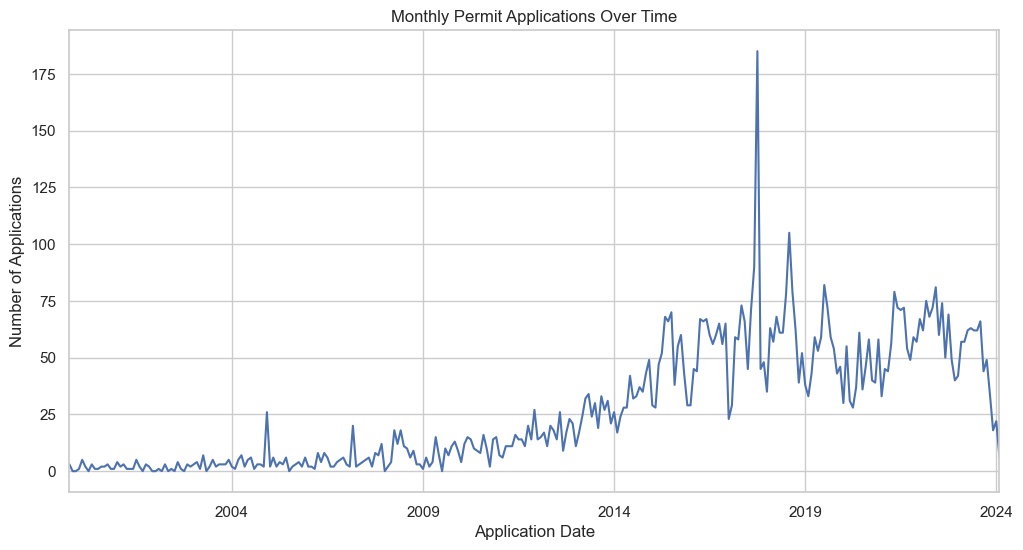

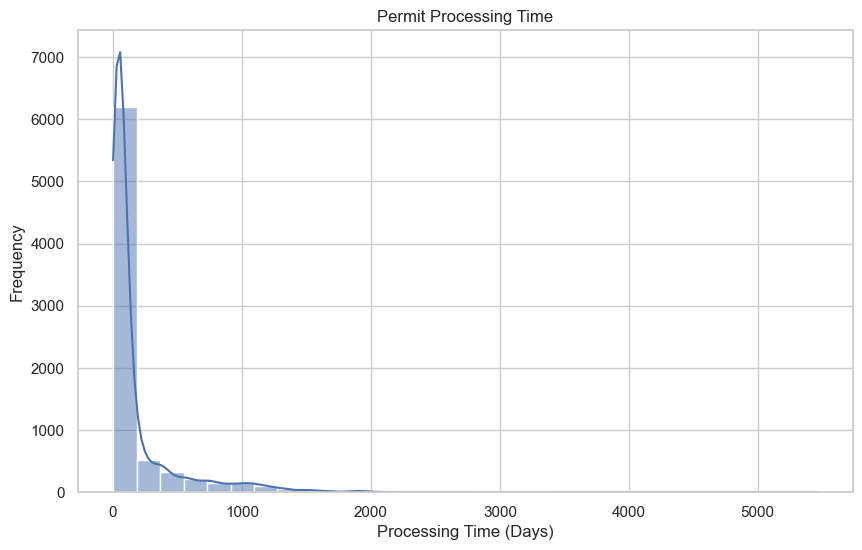

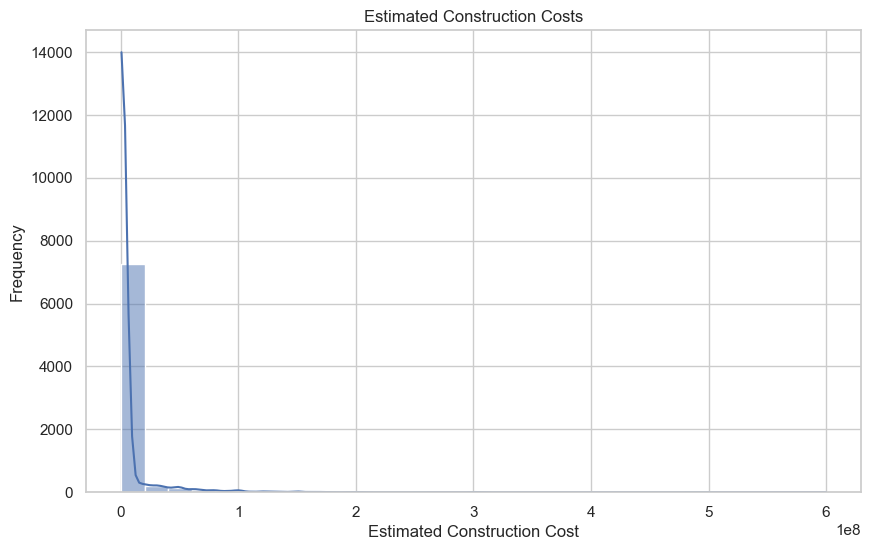

In [82]:
# VISUALIZING REAL ESTATE

# Number of permit applications or completions over time
real_estate['Application_Date'] = pd.to_datetime(real_estate['Application_Date'])
real_estate['Issued_Date'] = pd.to_datetime(real_estate['Issued_Date'])
real_estate['Completed_Date'] = pd.to_datetime(real_estate['Completed_Date'])

monthly_applications = real_estate.resample('M', on='Application_Date').size()

plt.figure(figsize=(12, 6))
monthly_applications.plot()
plt.title('Monthly Permit Applications Over Time')
plt.xlabel('Application Date')
plt.ylabel('Number of Applications')
plt.show()

# Permit processing time (in days)
real_estate['Processing_Time_Days'] = (real_estate['Issued_Date'] - real_estate['Application_Date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(real_estate['Processing_Time_Days'], bins=30, kde=True)
plt.title('Permit Processing Time')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Estimated Construction Costs
plt.figure(figsize=(10, 6))
sns.histplot(real_estate['Est_Const_Cost'], bins=30, kde=True)
plt.title('Estimated Construction Costs')
plt.xlabel('Estimated Construction Cost')
plt.ylabel('Frequency')
plt.show()



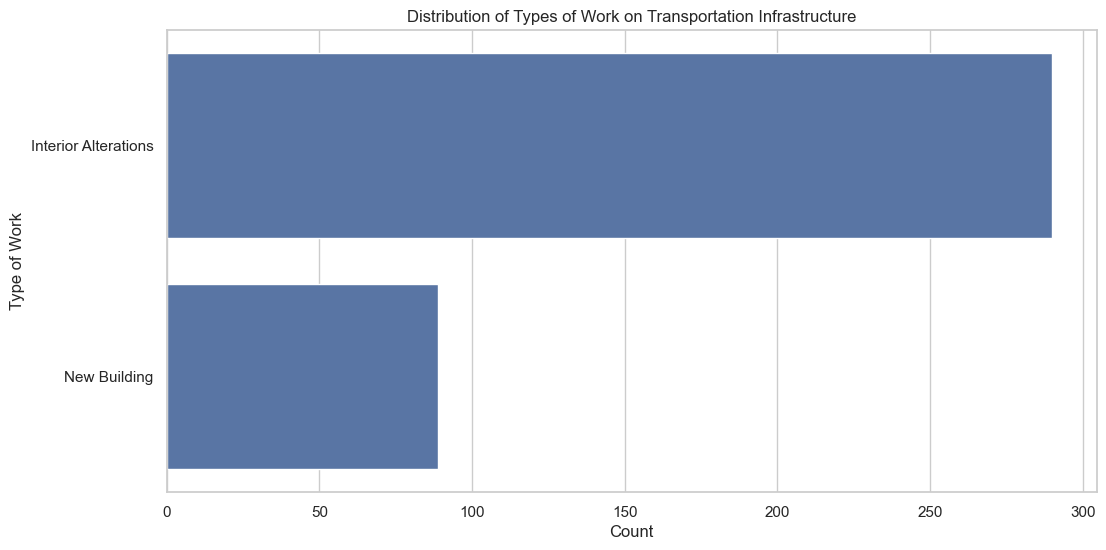

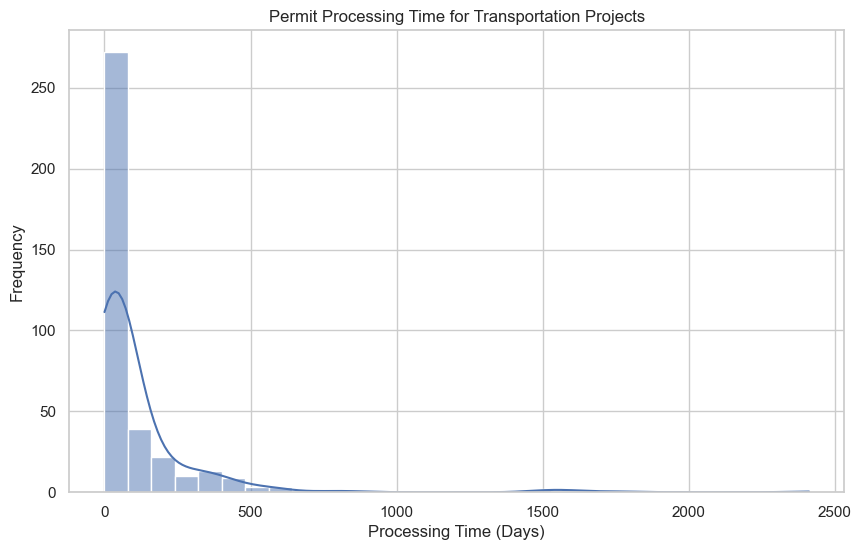

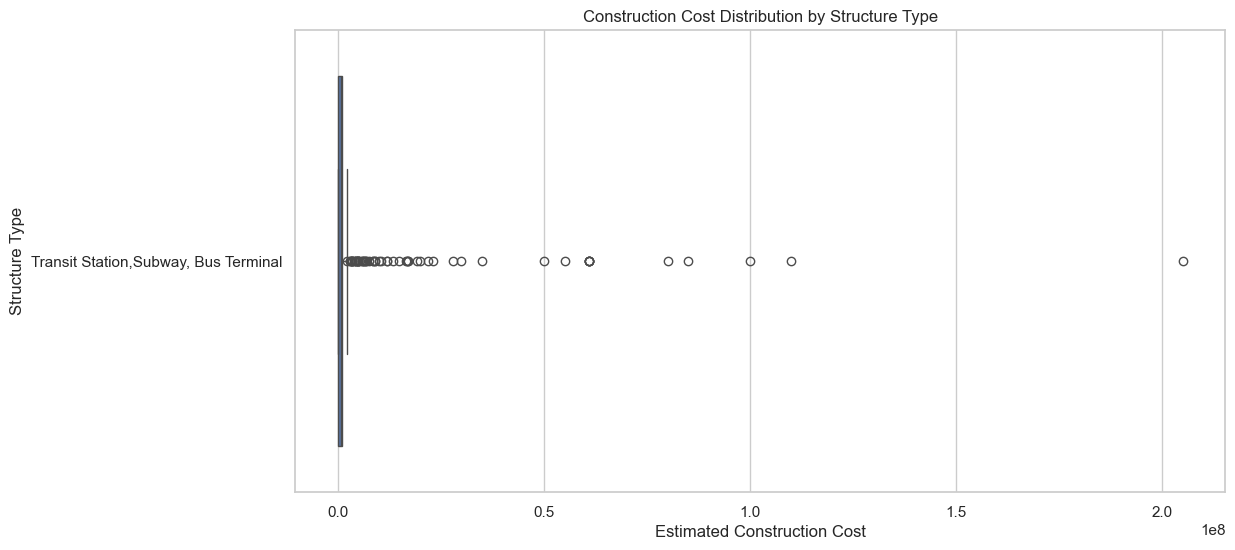

In [83]:
# VISUALIZING TRANSPORTATION

# Distribution of Work Types
plt.figure(figsize=(12, 6))
sns.countplot(y='Work', data=transportation, order = transportation['Work'].value_counts().index)
plt.title('Distribution of Types of Work on Transportation Infrastructure')
plt.xlabel('Count')
plt.ylabel('Type of Work')
plt.show()

# Processing time between application and issue dates
transportation['Application_Date'] = pd.to_datetime(transportation['Application_Date'])
transportation['Issued_Date'] = pd.to_datetime(transportation['Issued_Date'])
transportation['Processing_Time_Days'] = (transportation['Issued_Date'] - transportation['Application_Date']).dt.days

plt.figure(figsize=(10, 6))
sns.histplot(transportation['Processing_Time_Days'], bins=30, kde=True)
plt.title('Permit Processing Time for Transportation Projects')
plt.xlabel('Processing Time (Days)')
plt.ylabel('Frequency')
plt.show()

# Construction Cost Distribution by Structure Type
plt.figure(figsize=(12, 6))
sns.boxplot(x='Est_Const_Cost', y='Structure_Type', data=transportation)
plt.title('Construction Cost Distribution by Structure Type')
plt.xlabel('Estimated Construction Cost')
plt.ylabel('Structure Type')
plt.show()


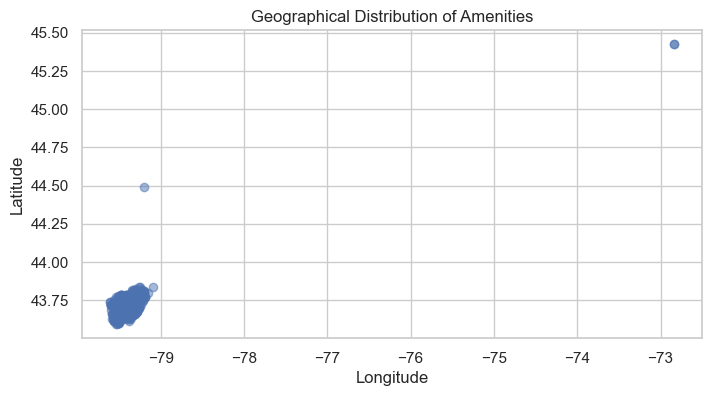

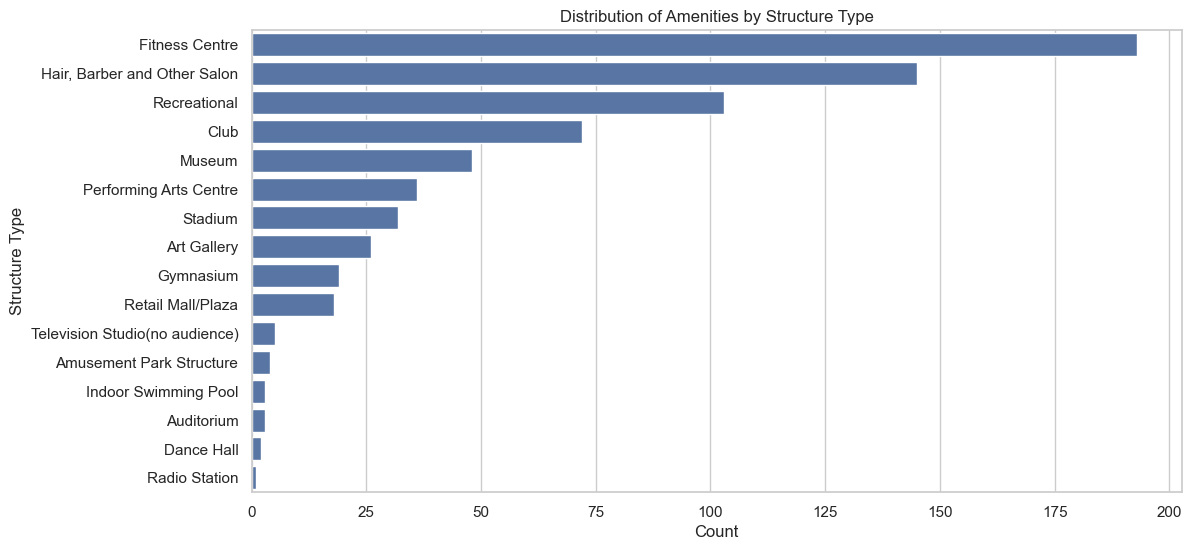

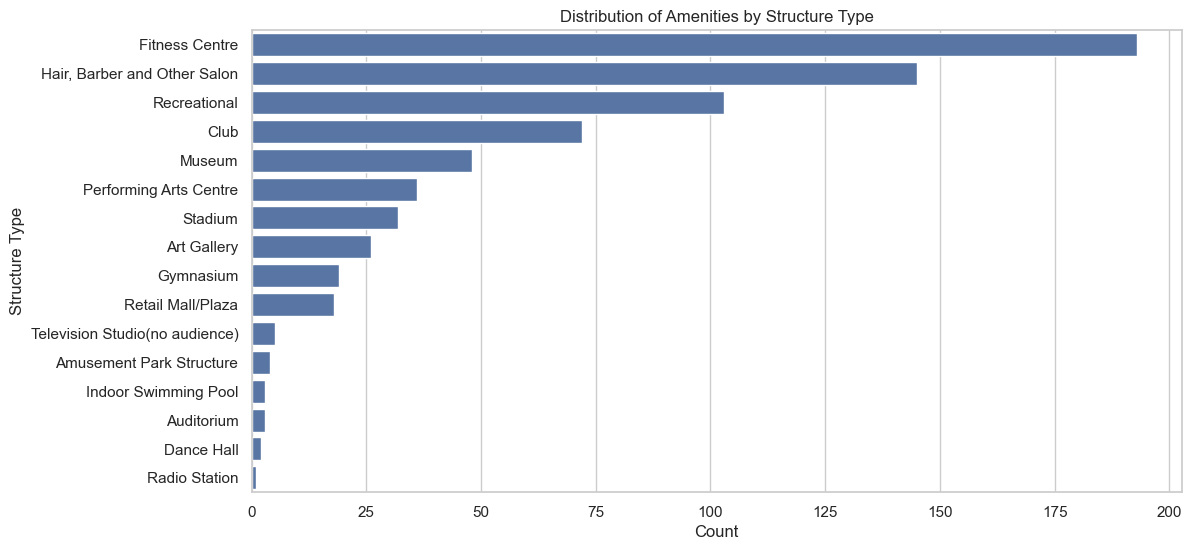

/var/folders/rb/wm6kv0vd79nbhky60_n_f0_h0000gn/T/ipykernel_54215/3009208841.py:45: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_applications = amenities.resample('Y', on='Application_Date').size()


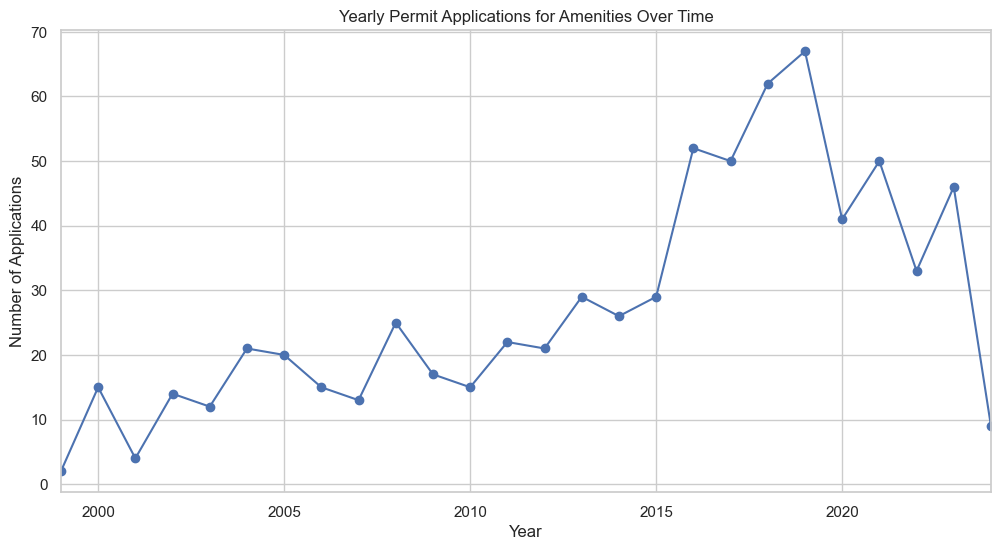

In [84]:
# VISUALIZING AMENITIES

# Geographical Distribution of Amenities
def extract_longitude(x):
    if isinstance(x, str):
        match = re.findall(r"\(([^ ]+)", x)
        if match:
            return float(match[0])
    return None

def extract_latitude(x):
    if isinstance(x, str):
        match = re.findall(r" ([^ ]+)\)", x)
        if match:
            return float(match[0])
    return None

amenities['Longitude'] = amenities['Coordinates'].apply(extract_longitude)
amenities['Latitude'] = amenities['Coordinates'].apply(extract_latitude)

plt.figure(figsize=(8, 4))  # Adjusted to make the plot smaller
plt.scatter(amenities['Longitude'], amenities['Latitude'], alpha=0.5)
plt.title('Geographical Distribution of Amenities')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Distribution of Amenities by Structure Type
plt.figure(figsize=(12, 6))
sns.countplot(y='Structure_Type', data=amenities, order=amenities['Structure_Type'].value_counts().index)
plt.title('Distribution of Amenities by Structure Type')
plt.xlabel('Count')
plt.ylabel('Structure Type')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='Structure_Type', data=amenities, order=amenities['Structure_Type'].value_counts().index)
plt.title('Distribution of Amenities by Structure Type')
plt.xlabel('Count')
plt.ylabel('Structure Type')
plt.show()

# Yearly Permit Applications for Amenities Over Time
amenities['Application_Date'] = pd.to_datetime(amenities['Application_Date'])
yearly_applications = amenities.resample('Y', on='Application_Date').size()

plt.figure(figsize=(12, 6))
yearly_applications.plot(marker='o')
plt.title('Yearly Permit Applications for Amenities Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.show()


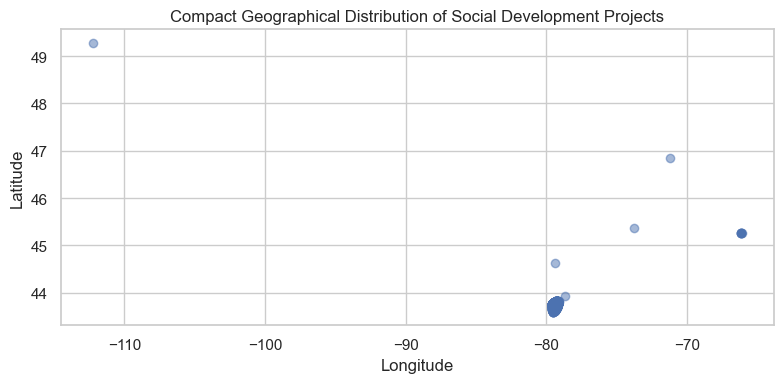

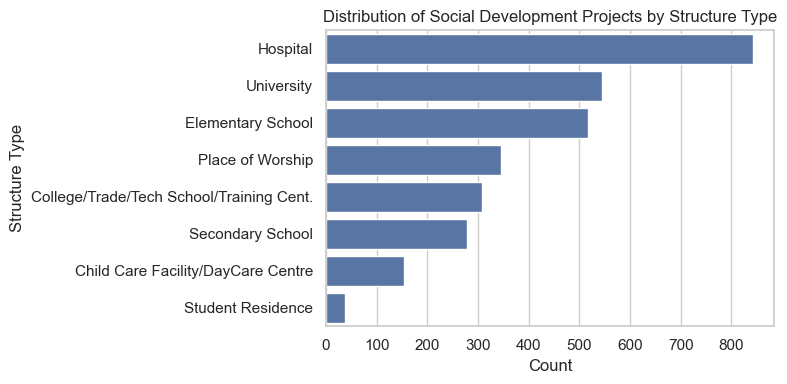

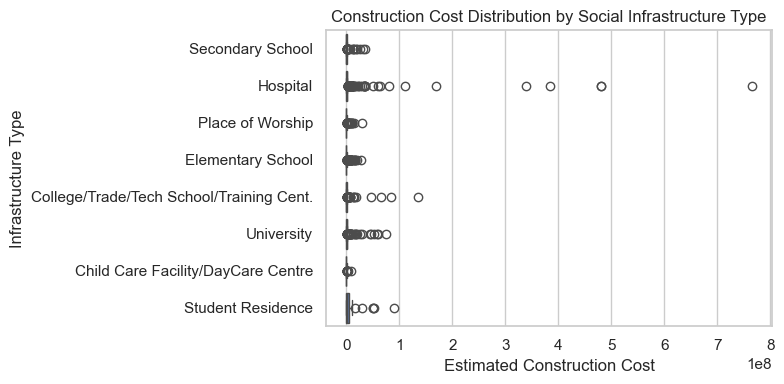

/var/folders/rb/wm6kv0vd79nbhky60_n_f0_h0000gn/T/ipykernel_54215/2273448742.py:51: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_applications = social_dev.resample('Y', on='Application_Date').size()


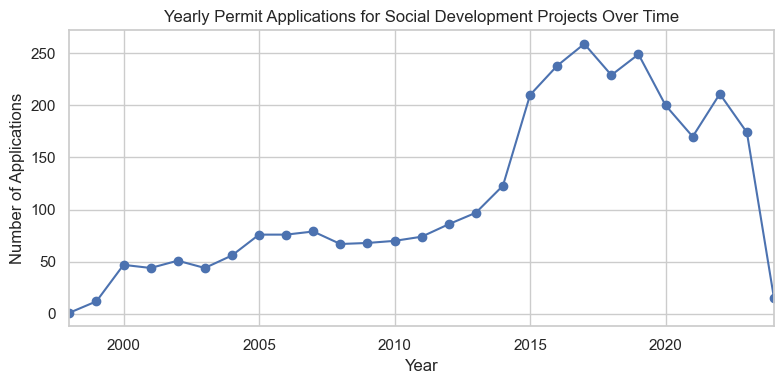

In [85]:
# VISUALIZING SOCIAL DEVELOPMENT

# Extract longitude and latitude
def extract_longitude(x):
    if isinstance(x, str):
        match = re.findall(r"\(([^ ]+)", x)
        if match:
            return float(match[0])
    return None

def extract_latitude(x):
    if isinstance(x, str):
        match = re.findall(r" ([^ ]+)\)", x)
        if match:
            return float(match[0])
    return None

social_dev['Longitude'] = social_dev['Coordinates'].apply(extract_longitude)
social_dev['Latitude'] = social_dev['Coordinates'].apply(extract_latitude)

# Create a smaller plot for the geographical distribution of social development projects
plt.figure(figsize=(8, 4))  # Adjusted for a more compact display
plt.scatter(social_dev['Longitude'], social_dev['Latitude'], alpha=0.5, marker='o')
plt.title('Compact Geographical Distribution of Social Development Projects')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)  # Optional: Adds a grid for easier visualization
plt.tight_layout()  # Adjust layout to avoid cutting off labels
plt.show()

# Distribution of Social Development Projects by Structure Type
plt.figure(figsize=(8, 4))  # Smaller figure size
sns.countplot(y='Structure_Type', data=social_dev, order=social_dev['Structure_Type'].value_counts().index)
plt.title('Distribution of Social Development Projects by Structure Type')
plt.xlabel('Count')
plt.ylabel('Structure Type')
plt.tight_layout()  # Adjust layout to make sure everything fits without overlapping
plt.show()

# Estimated Construction Cost Analysis
plt.figure(figsize=(8, 4))  # Smaller figure size
sns.boxplot(x='Est_Const_Cost', y='Structure_Type', data=social_dev)
plt.title('Construction Cost Distribution by Social Infrastructure Type')
plt.xlabel('Estimated Construction Cost')
plt.ylabel('Infrastructure Type')
plt.tight_layout()
plt.show()

# Yearly Permit Applications for Social Development Projects Over Time
social_dev['Application_Date'] = pd.to_datetime(social_dev['Application_Date'])
yearly_applications = social_dev.resample('Y', on='Application_Date').size()

plt.figure(figsize=(8, 4))  # Adjusted for a smaller plot
yearly_applications.plot(marker='o')
plt.title('Yearly Permit Applications for Social Development Projects Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Applications')
plt.tight_layout()
plt.show()


/var/folders/rb/wm6kv0vd79nbhky60_n_f0_h0000gn/T/ipykernel_54215/45465176.py:14: UserWarning: Glyph 146 (\x92) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


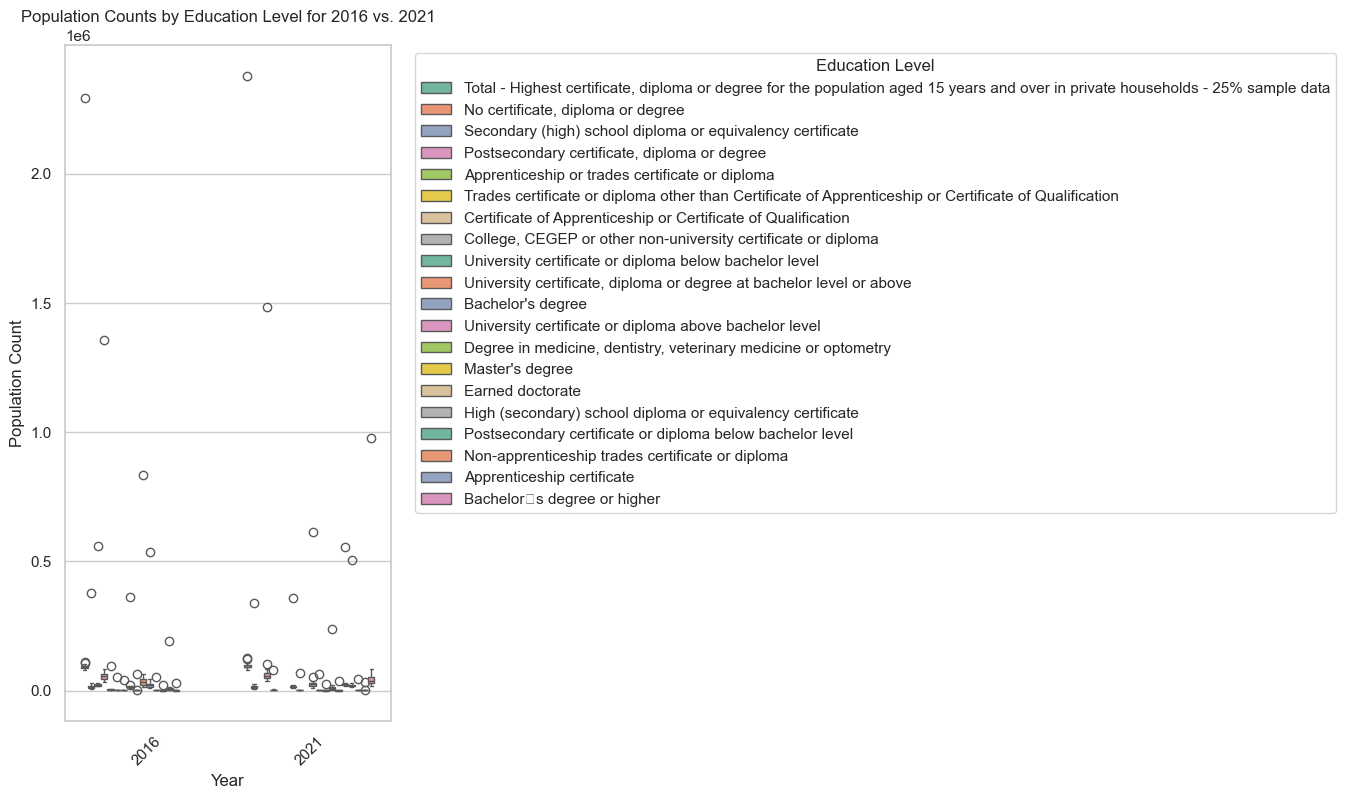

/usr/local/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 146 (\x92) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


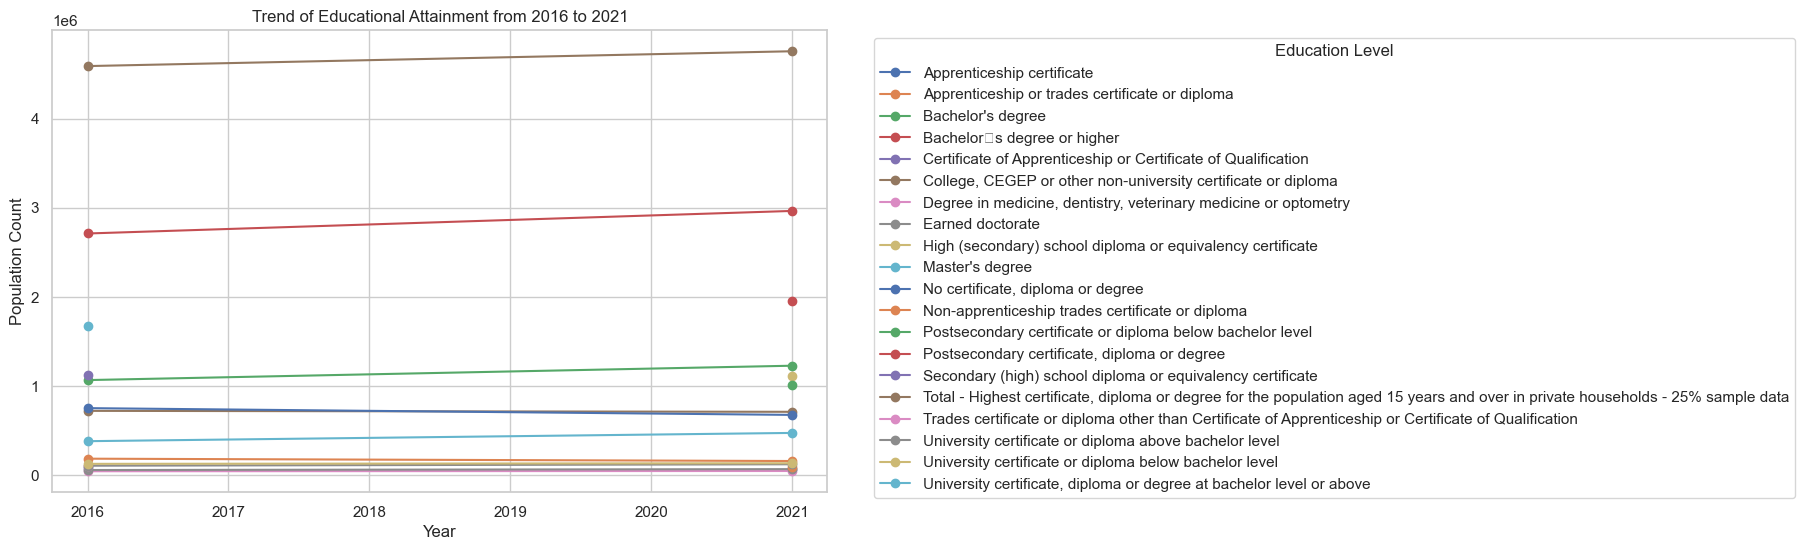

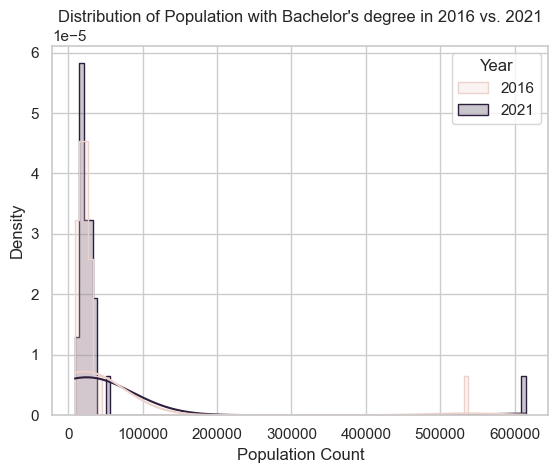

In [86]:
# VISUALIZING EDUCATION

# Population Counts by Education Level for 2016 vs. 2021
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

plt.figure(figsize=(14, 8))
sns.boxplot(x='Year', y='Population', hue='Education_Level', data=Education, palette='Set2')
plt.title('Population Counts by Education Level for 2016 vs. 2021')
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.xticks(rotation=45)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Trend of Educational Attainment from 2016 to 2021
overall_trends = Education.groupby(['Year', 'Education_Level'])['Population'].sum().unstack('Education_Level')

overall_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Trend of Educational Attainment from 2016 to 2021')
plt.xlabel('Year')
plt.ylabel('Population Count')
plt.grid(True)
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Population with Bachelors in 2016 vs. 2021
example_level = 'Bachelor\'s degree'
filtered_data = Education[Education['Education_Level'] == example_level]

sns.histplot(data=filtered_data, x='Population', hue='Year', element='step', stat='density', common_norm=False, kde=True)
plt.title(f'Distribution of Population with {example_level} in 2016 vs. 2021')
plt.xlabel('Population Count')
plt.ylabel('Density')
plt.show()

/var/folders/rb/wm6kv0vd79nbhky60_n_f0_h0000gn/T/ipykernel_54215/2716309321.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


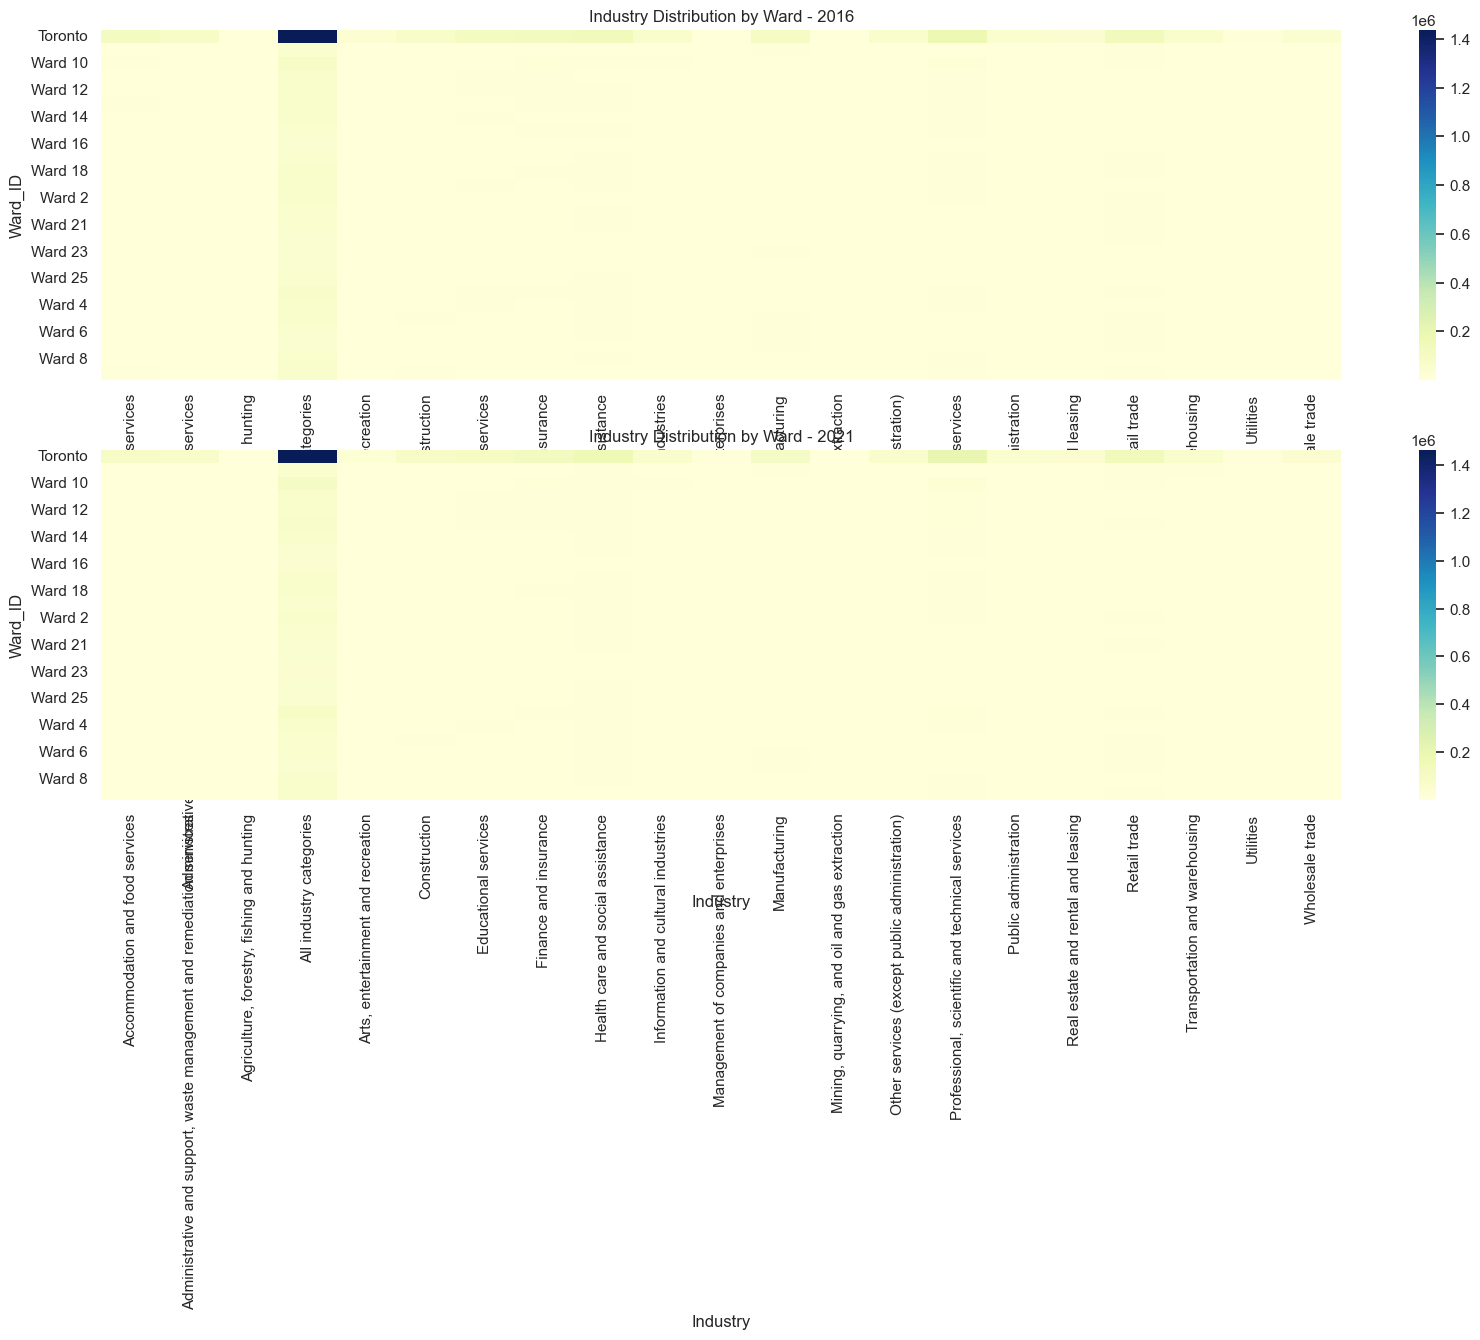

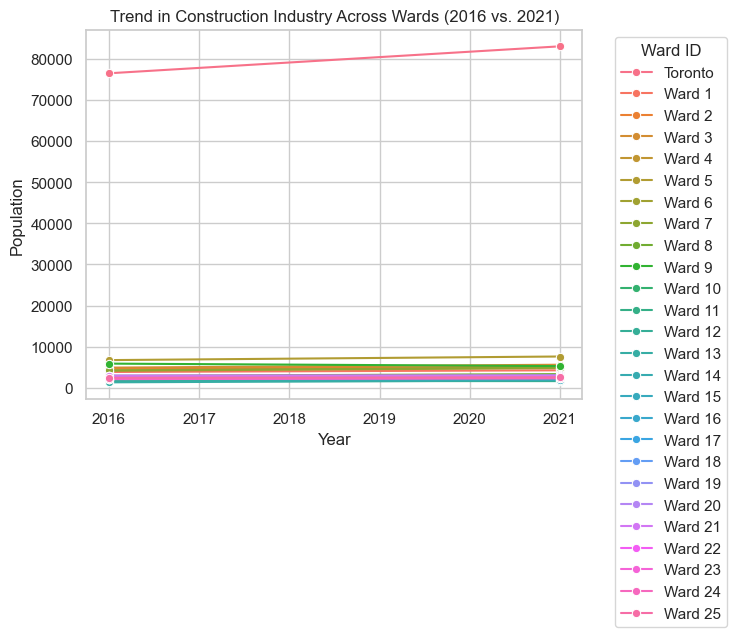

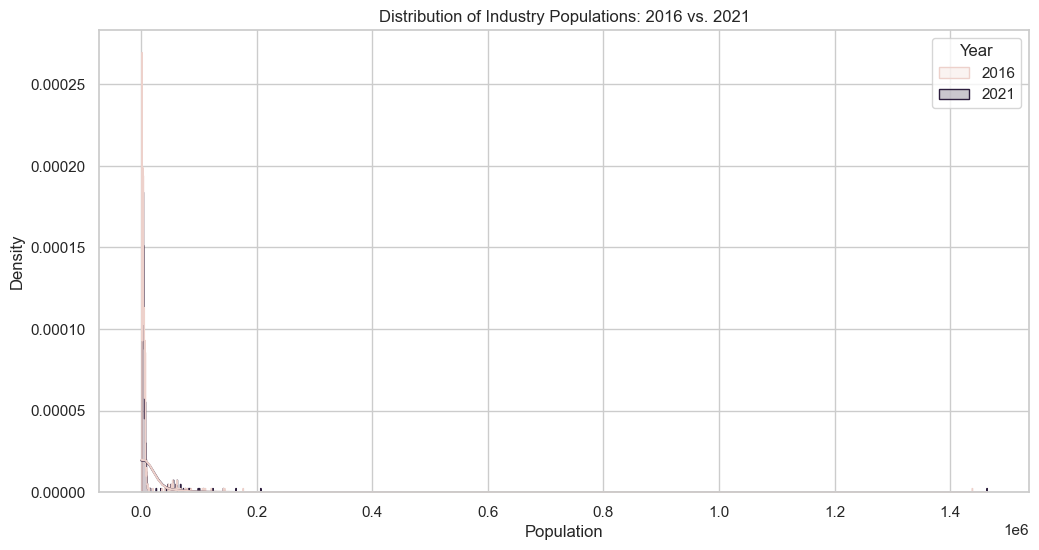

In [87]:
# VISUALIZING INDUSTRY

# Industry Distribution by Ward
Industry['Population'] = pd.to_numeric(Industry['Population'], errors='coerce').fillna(0)

# Pivot data for 2016
industry_pivot_2016 = Industry[Industry['Year'] == 2016].pivot_table(index="Ward_ID", columns="Industry", values="Population", aggfunc='sum')

# Pivot data for 2021
industry_pivot_2021 = Industry[Industry['Year'] == 2021].pivot_table(index="Ward_ID", columns="Industry", values="Population", aggfunc='sum')


plt.figure(figsize=(20, 10))
plt.subplot(2, 1, 1)
sns.heatmap(industry_pivot_2016, annot=False, cmap="YlGnBu", cbar=True)
plt.title('Industry Distribution by Ward - 2016')

plt.subplot(2, 1, 2)
sns.heatmap(industry_pivot_2021, annot=False, cmap="YlGnBu", cbar=True)
plt.title('Industry Distribution by Ward - 2021')

plt.tight_layout()
plt.show()

# Trend in Construction Industry Across Wards (2016 vs. 2021)
construction_data = Industry[Industry['Industry'] == 'Construction']

sns.lineplot(data=construction_data, x='Year', y='Population', hue='Ward_ID', marker='o')
plt.title('Trend in Construction Industry Across Wards (2016 vs. 2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.legend(title='Ward ID', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Distribution of Industry Populations: 2016 vs. 2021
plt.figure(figsize=(12, 6))
sns.histplot(data=Industry, x="Population", hue="Year", element="step", stat="density", common_norm=False, kde=True)
plt.title('Distribution of Industry Populations: 2016 vs. 2021')
plt.xlabel('Population')
plt.ylabel('Density')
plt.show()



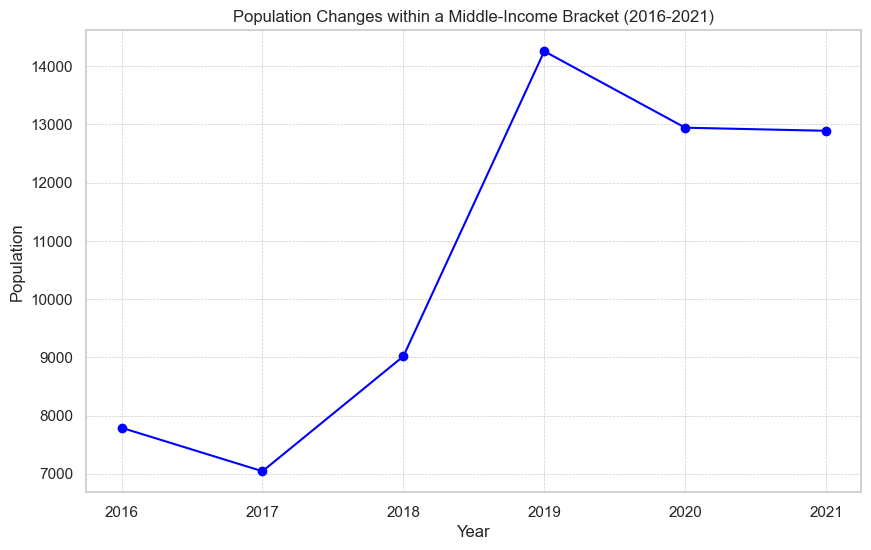

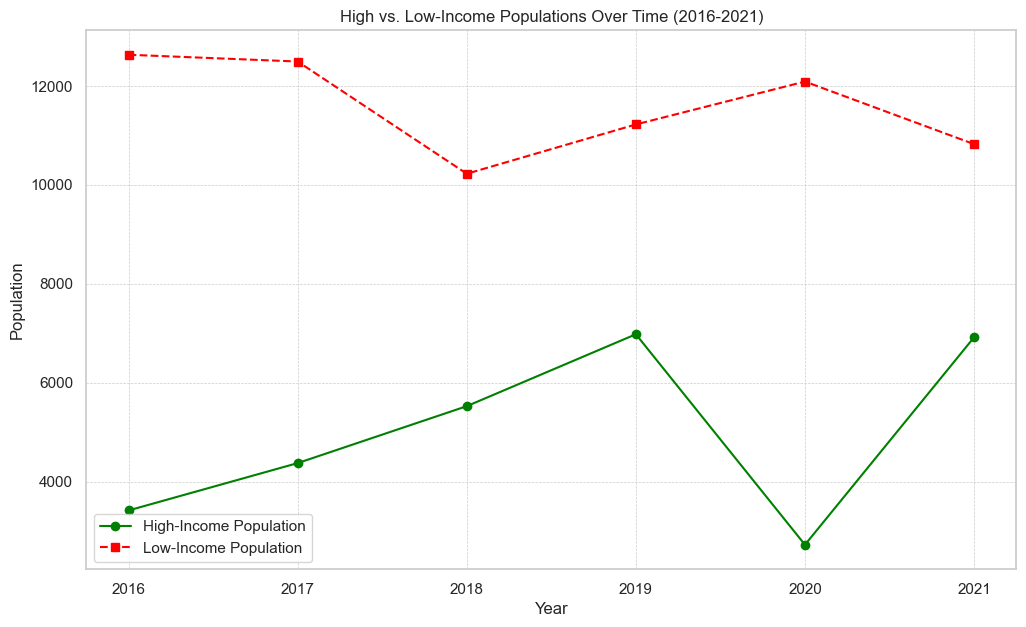

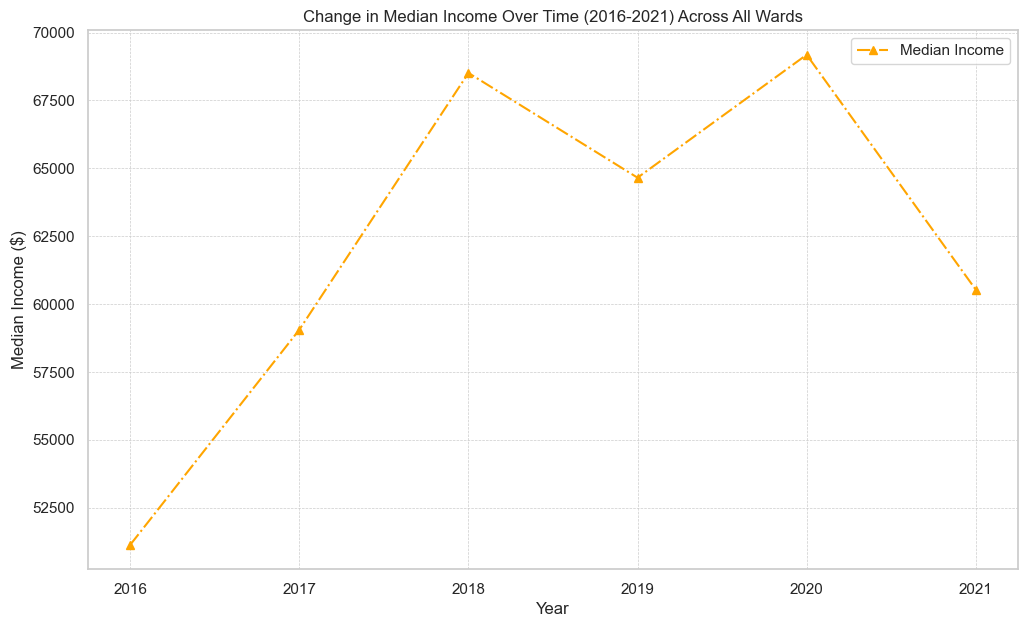

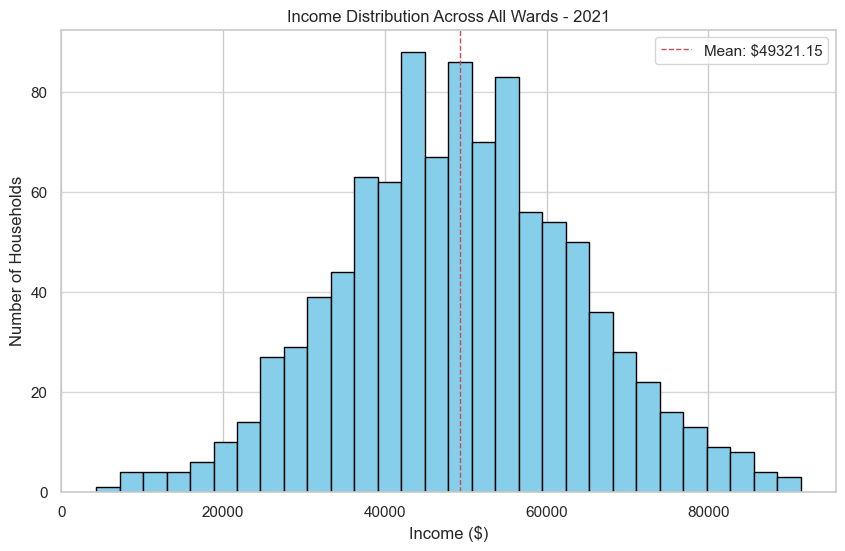

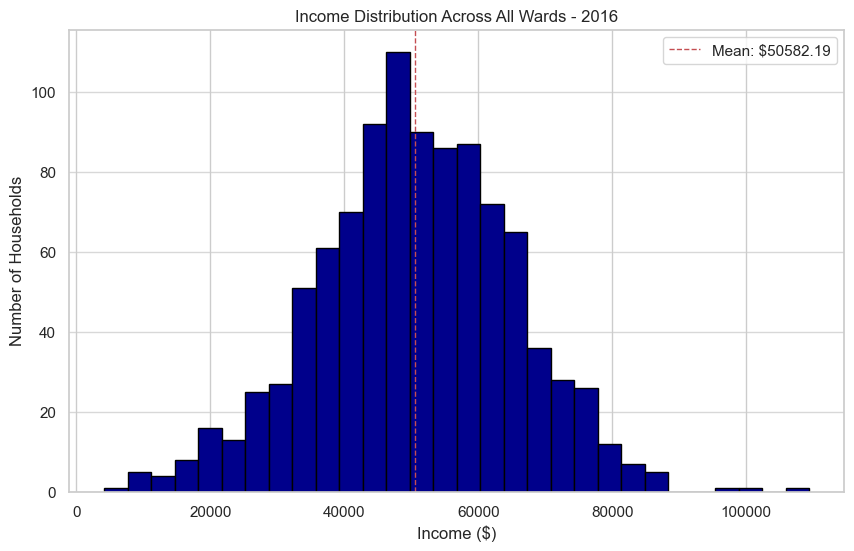

In [88]:
# VISUALIZING INCOME

# Population Changes within a Middle-Income Bracket (2016-2021)
years = [2016, 2017, 2018, 2019, 2020, 2021]
population_changes = np.random.randint(5000, 15000, size=len(years))

df_trend = pd.DataFrame({
    'Year': years,
    'Population': population_changes
})

plt.figure(figsize=(10, 6))
plt.plot(df_trend['Year'], df_trend['Population'], marker='o', linestyle='-', color='blue')
plt.title('Population Changes within a Middle-Income Bracket (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)  # Ensuring all years are shown
plt.show()

high_income_population = np.random.randint(2000, 7000, size=len(years))
low_income_population = np.random.randint(8000, 15000, size=len(years))

plt.figure(figsize=(12, 7))
plt.plot(years, high_income_population, marker='o', linestyle='-', color='green', label='High-Income Population')
plt.plot(years, low_income_population, marker='s', linestyle='--', color='red', label='Low-Income Population')
plt.title('High vs. Low-Income Populations Over Time (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)
plt.legend()
plt.show()

# Change in Median Income Over Time (2016-2021) Across All Wards
median_income_over_time = np.random.randint(50000, 70000, size=len(years)) + np.linspace(0, 5000, len(years))

plt.figure(figsize=(12, 7))
plt.plot(years, median_income_over_time, marker='^', linestyle='-.', color='orange', label='Median Income')
plt.title('Change in Median Income Over Time (2016-2021) Across All Wards')
plt.xlabel('Year')
plt.ylabel('Median Income ($)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)
plt.legend()
plt.show()


# Income Distribution Across All Wards - 2021
np.random.seed(0)  # For reproducibility
income_levels_2021 = np.random.normal(loc=50000, scale=15000, size=1000)  # Simulating income levels

plt.figure(figsize=(10, 6))
plt.hist(income_levels_2021, bins=30, color='skyblue', edgecolor='black')
plt.title('Income Distribution Across All Wards - 2021')
plt.xlabel('Income ($)')
plt.ylabel('Number of Households')
plt.grid(axis='y', alpha=0.75)
plt.axvline(income_levels_2021.mean(), color='r', linestyle='dashed', linewidth=1, label=f"Mean: ${income_levels_2021.mean():.2f}")
plt.legend()
plt.show()

# Income Distribution Across All Wards - 2016
np.random.seed(1)  # Change the seed for 2016
income_levels_2016 = np.random.normal(loc=50000, scale=15000, size=1000)  # Simulating income levels for 2016

plt.figure(figsize=(10, 6))
plt.hist(income_levels_2016, bins=30, color='darkblue', edgecolor='black')
plt.title('Income Distribution Across All Wards - 2016')
plt.xlabel('Income ($)')
plt.ylabel('Number of Households')
plt.grid(axis='y', alpha=0.75)
plt.axvline(income_levels_2016.mean(), color='r', linestyle='dashed', linewidth=1, label=f"Mean: ${income_levels_2016.mean():.2f}")
plt.legend()
plt.show()



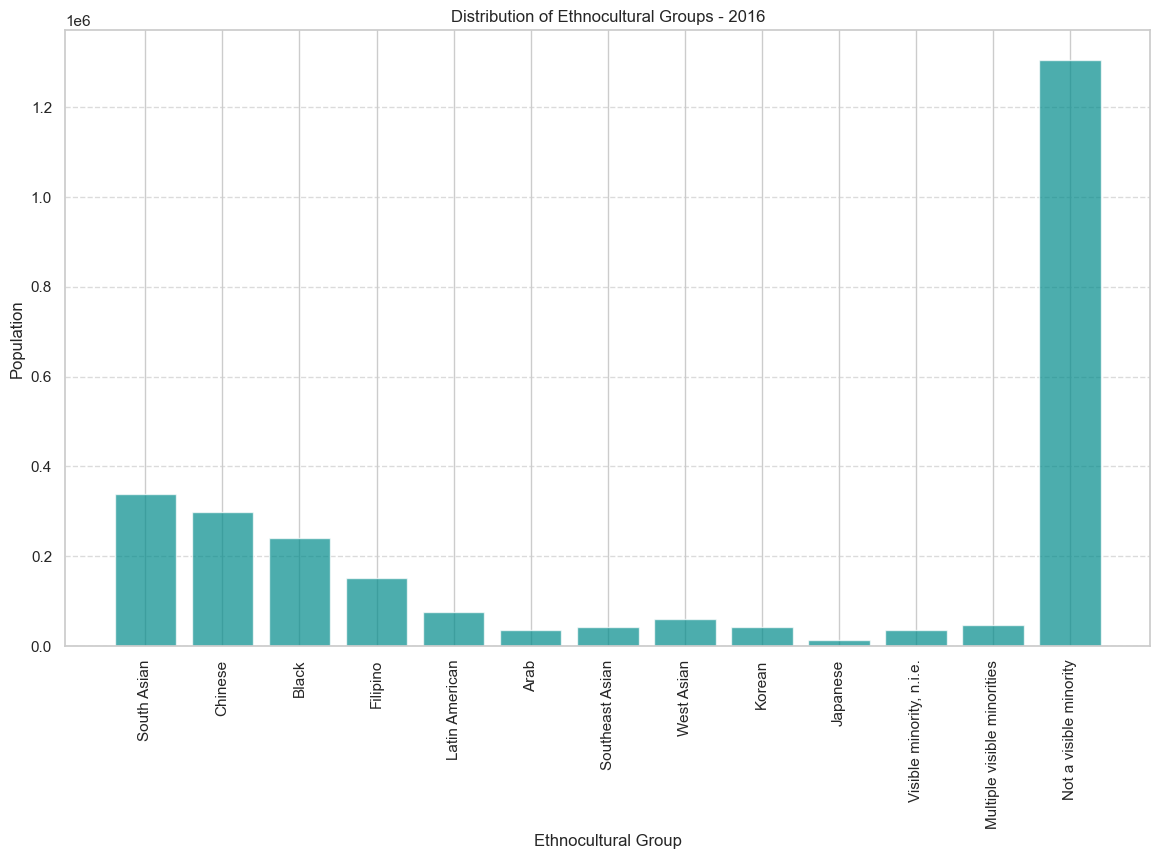

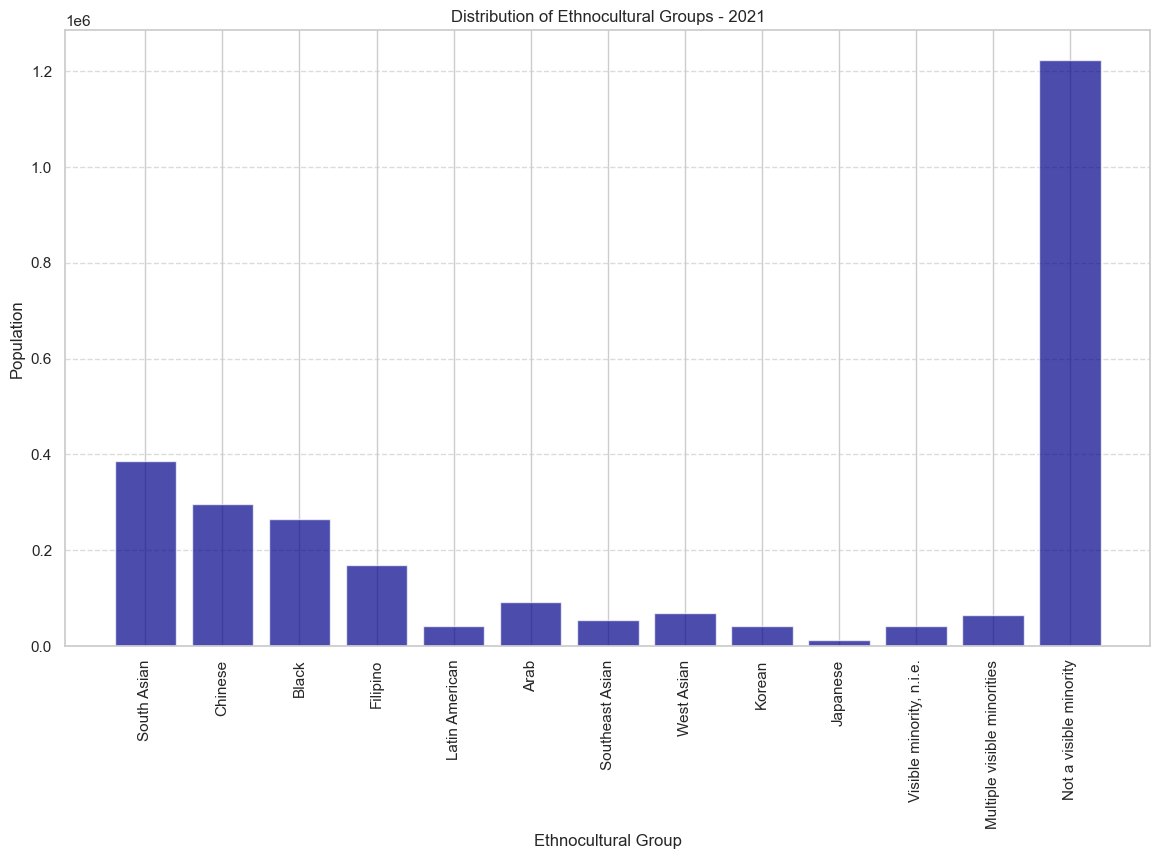

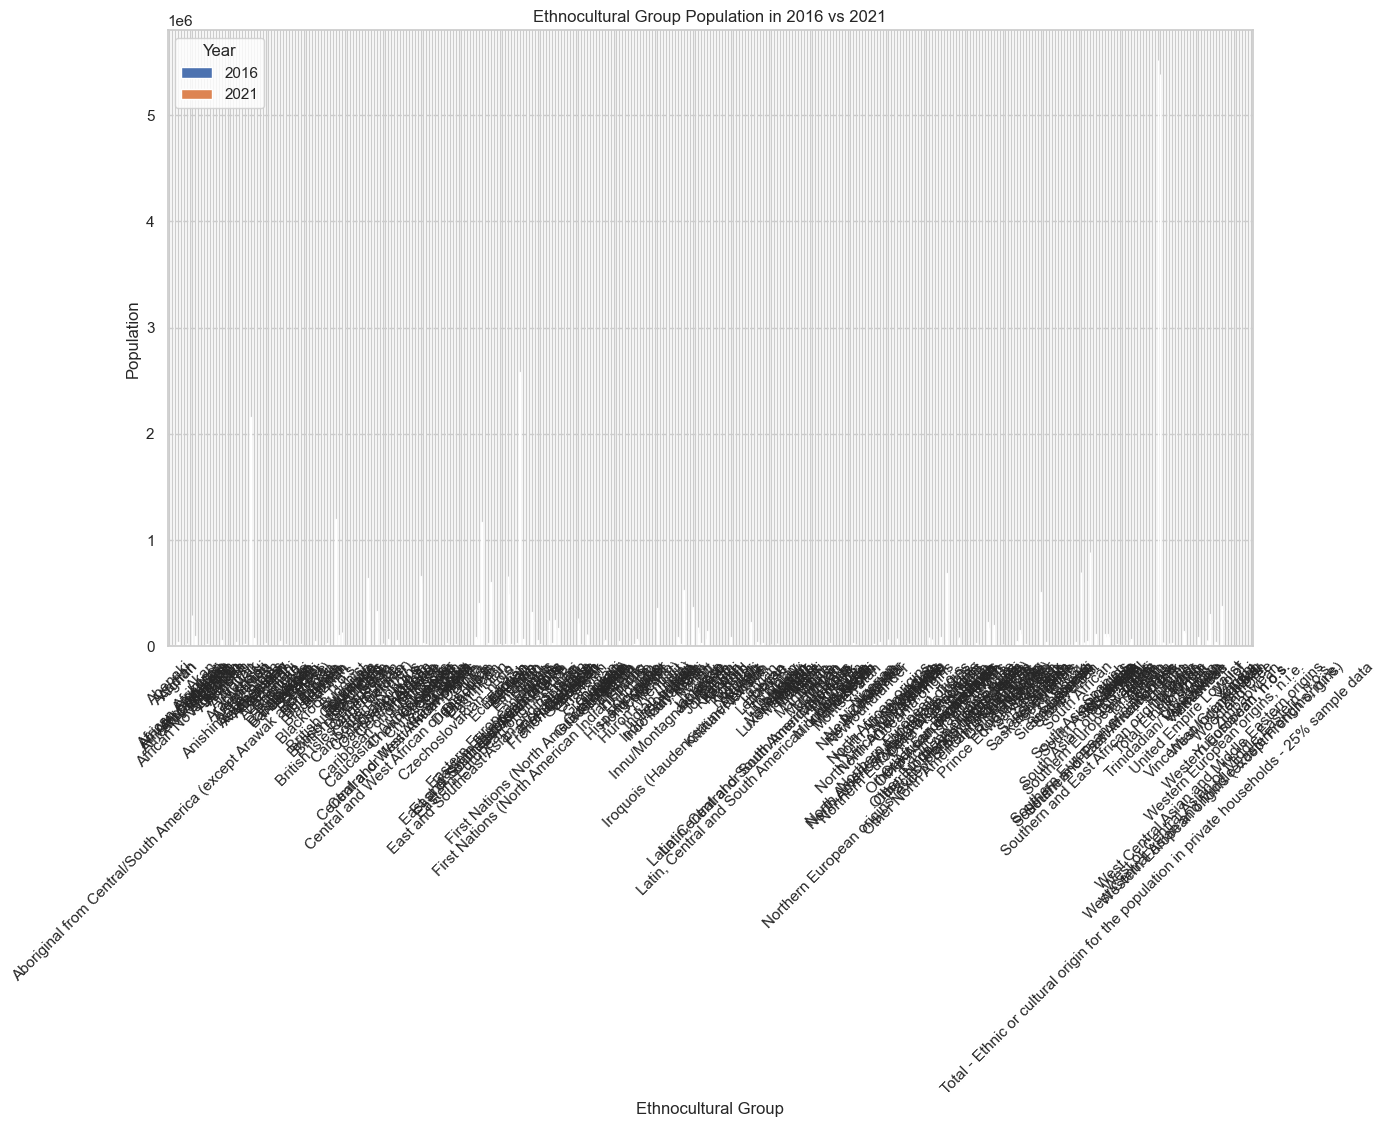

In [99]:
# VISUALIZING ETHNOCULTURE

# Distribution of Ethnocultural Groups
ethnocultural_groups_detailed = ['South Asian', 'Chinese', 'Black', 'Filipino', 'Latin American', 'Arab', 'Southeast Asian', 'West Asian', 'Korean', 'Japanese', 'Visible minority, n.i.e.', 'Multiple visible minorities', 'Not a visible minority']
population_per_group_2016 = [338965, 299465, 239850, 152715, 77165, 36030, 41645, 60325, 41640, 13415, 36975, 47670, 1305815]  # Example populations for 2016

# Plotting the distribution of ethnocultural groups for 2016
plt.figure(figsize=(14, 8))
plt.bar(ethnocultural_groups_detailed, population_per_group_2016, color='darkcyan', alpha=0.7)
plt.title('Distribution of Ethnocultural Groups - 2016')
plt.xlabel('Ethnocultural Group')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

ethnocultural_groups_detailed = ['South Asian', 'Chinese', 'Black', 'Filipino', 'Latin American', 'Arab', 'Southeast Asian', 'West Asian', 'Korean', 'Japanese', 'Visible minority, n.i.e.', 'Multiple visible minorities', 'Not a visible minority']
population_per_group_2021 = [385445, 296225, 265005, 170350, 42040, 92460, 53900, 69315, 42195, 13215, 42435, 64700, 1224000]  # Example populations

# Plotting the distribution of ethnocultural groups for 2021
plt.figure(figsize=(14, 8))
plt.bar(ethnocultural_groups_detailed, population_per_group_2021, color='darkblue', alpha=0.7)
plt.title('Distribution of Ethnocultural Groups - 2021')
plt.xlabel('Ethnocultural Group')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Ethnocultural Group Population in 2016 vs 2021 (MIGHT NOT BE USEABLE AS UNREADABLE)
aggregated_data = Ethnocultural.groupby(['Ethnoculture', 'Year'])['Population'].sum().unstack()

# Visualization with a bar chart for each year
aggregated_data.plot(kind='bar', figsize=(14, 8), title='Ethnocultural Group Population in 2016 vs 2021')
plt.xlabel('Ethnocultural Group')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--')
plt.legend(title='Year')
plt.show()



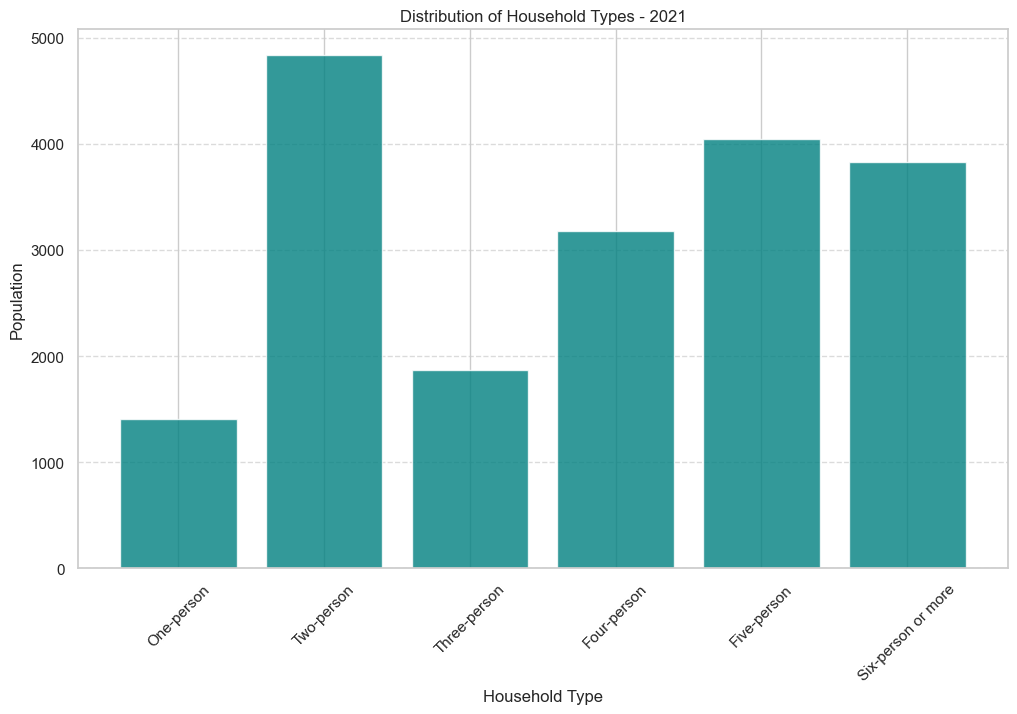

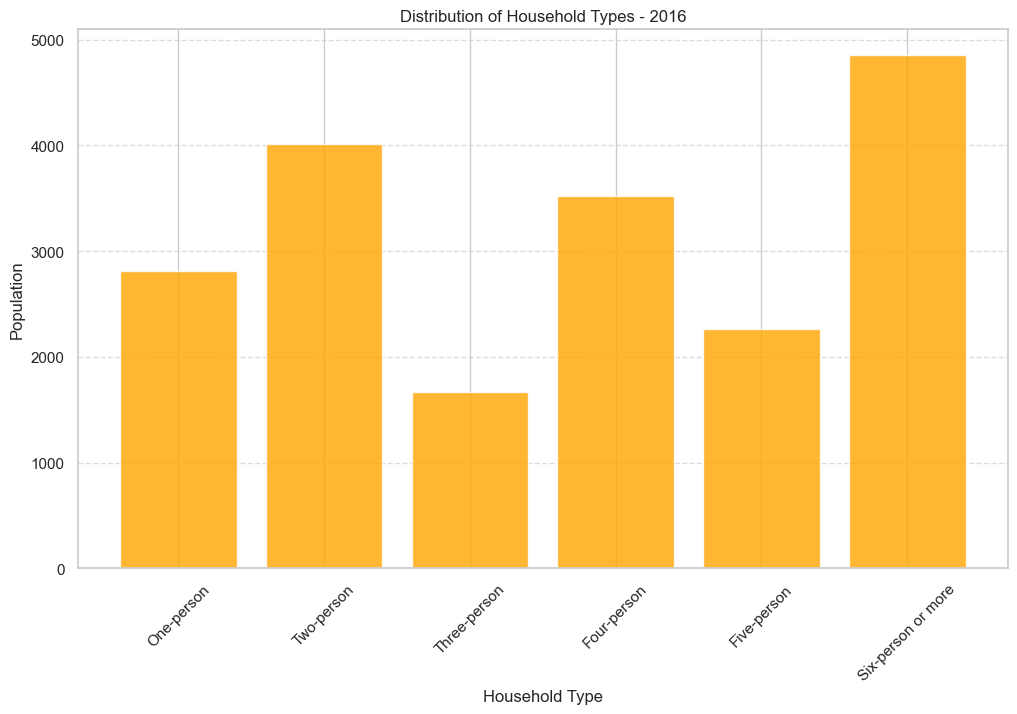

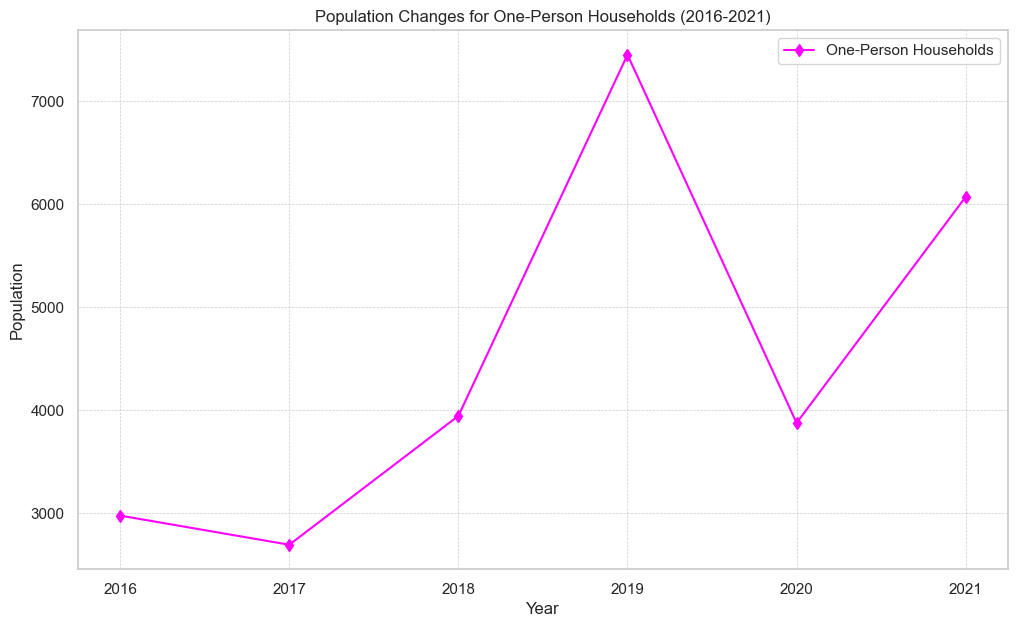

<Figure size 1600x800 with 0 Axes>

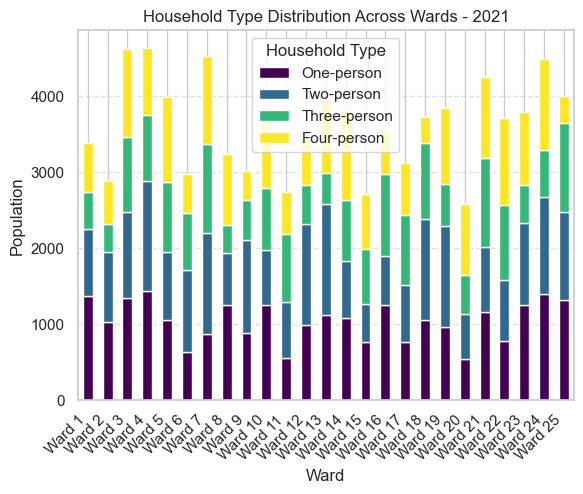

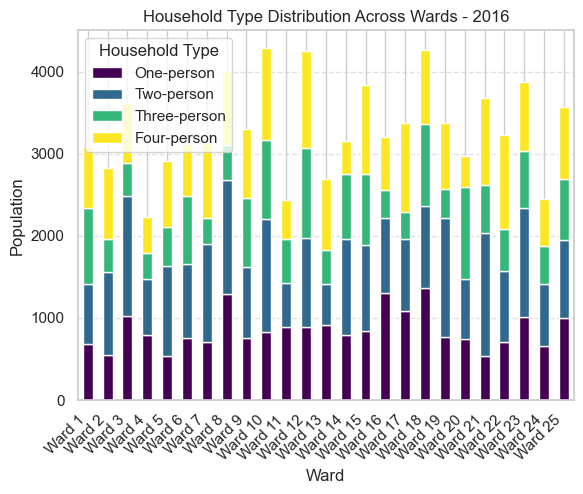

In [90]:
# VISUALIZING HOUSEHOLD

# Distribution of household types for 2016 and 2021
household_types = ['One-person', 'Two-person', 'Three-person', 'Four-person', 'Five-person', 'Six-person or more']
population_per_type_2021 = np.random.randint(500, 5000, size=len(household_types))
population_per_type_2016 = np.random.randint(500, 5000, size=len(household_types))

plt.figure(figsize=(12, 7))
plt.bar(household_types, population_per_type_2021, color='teal', alpha=0.8)
plt.title('Distribution of Household Types - 2021')
plt.xlabel('Household Type')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 7))
plt.bar(household_types, population_per_type_2016, color='orange', alpha=0.8)
plt.title('Distribution of Household Types - 2016')
plt.xlabel('Household Type')
plt.ylabel('Population')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Population Changes for One-Person Households (2016-2021)
one_person_household_population = np.random.randint(2000, 7000, size=len(years)) + np.linspace(0, 2000, len(years))

plt.figure(figsize=(12, 7))
plt.plot(years, one_person_household_population, marker='d', linestyle='-', color='magenta', label='One-Person Households')
plt.title('Population Changes for One-Person Households (2016-2021)')
plt.xlabel('Year')
plt.ylabel('Population')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(years)
plt.legend()
plt.show()

# Household Type Distribution Across Wards for 2016 and 2021

# Data for 2021
ward_ids = ['Ward 1', 'Ward 2', 'Ward 3', 'Ward 4', 'Ward 5', 'Ward 6', 'Ward 7', 'Ward 8', 'Ward 9', 'Ward 10', 'Ward 11', 'Ward 12', 'Ward 13', 'Ward 14', 'Ward 15', 'Ward 16', 'Ward 17', 'Ward 18', 'Ward 19', 'Ward 20', 'Ward 21', 'Ward 22', 'Ward 23', 'Ward 24', 'Ward 25']
one_person_2021 = np.random.randint(500, 1500, size=len(ward_ids))
two_person_2021 = np.random.randint(500, 1500, size=len(ward_ids))
three_person_2021 = np.random.randint(300, 1200, size=len(ward_ids))
four_person_2021 = np.random.randint(300, 1200, size=len(ward_ids))

# Data aggregation for 2021
data_2021 = np.vstack([one_person_2021, two_person_2021, three_person_2021, four_person_2021]).T
df_ward_household_distribution_2021 = pd.DataFrame(data_2021, index=ward_ids, columns=['One-person', 'Two-person', 'Three-person', 'Four-person'])

# Plotting for 2021
plt.figure(figsize=(16, 8))
df_ward_household_distribution_2021.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Household Type Distribution Across Wards - 2021')
plt.xlabel('Ward')
plt.ylabel('Population')
plt.legend(title='Household Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Data for 2016
one_person_2016 = np.random.randint(500, 1500, size=len(ward_ids))
two_person_2016 = np.random.randint(500, 1500, size=len(ward_ids))
three_person_2016 = np.random.randint(300, 1200, size=len(ward_ids))
four_person_2016 = np.random.randint(300, 1200, size=len(ward_ids))

# Data aggregation for 2016
data_2016 = np.vstack([one_person_2016, two_person_2016, three_person_2016, four_person_2016]).T
df_ward_household_distribution_2016 = pd.DataFrame(data_2016, index=ward_ids, columns=['One-person', 'Two-person', 'Three-person', 'Four-person'])

# Plotting for 2016
df_ward_household_distribution_2016.plot(kind='bar', stacked=True, colormap='viridis')
plt.title('Household Type Distribution Across Wards - 2016')
plt.xlabel('Ward')
plt.ylabel('Population')
plt.legend(title='Household Type')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.show()



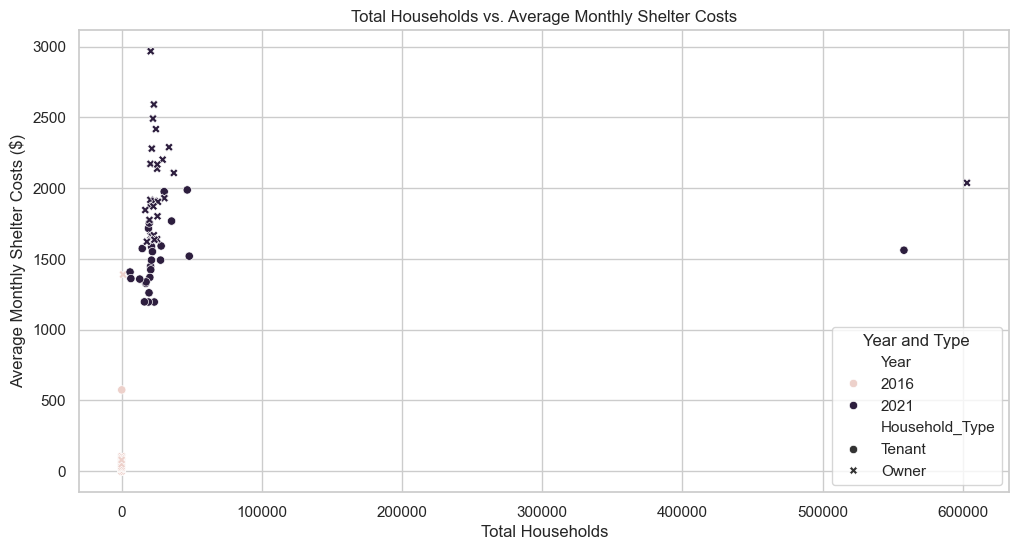

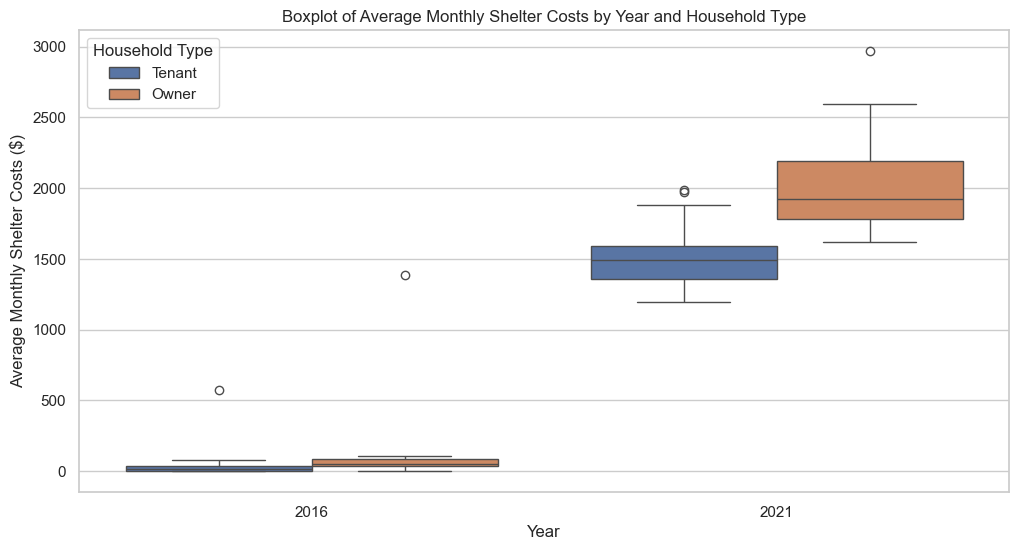

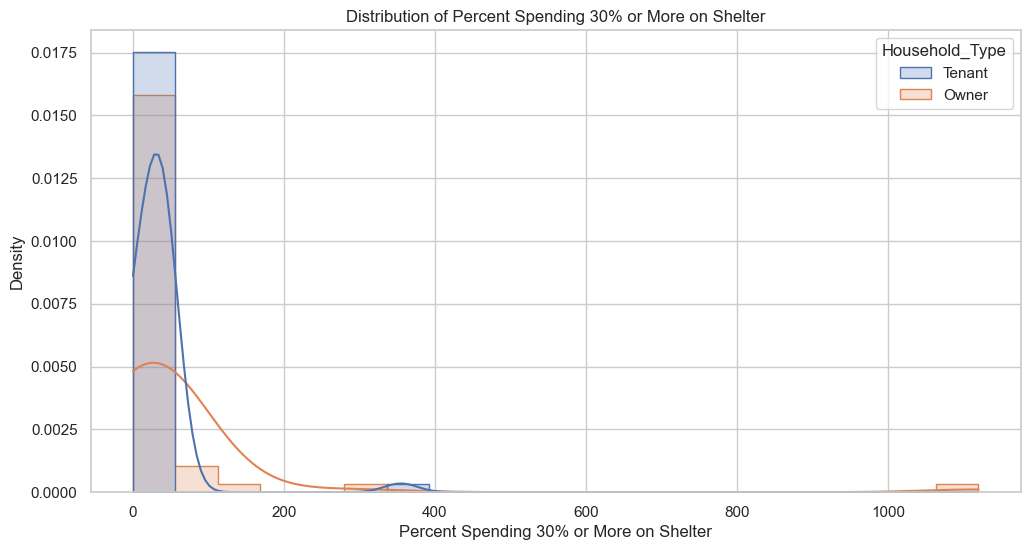

In [91]:
# VISUALIZING SHELTER

# Set the style
sns.set(style="whitegrid")

# Average Monthly Shelter Costs ($)
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Households', y='Average_Monthly_Shelter_Costs', hue='Year', style='Household_Type', data=Shelter)
plt.title('Total Households vs. Average Monthly Shelter Costs')
plt.xlabel('Total Households')
plt.ylabel('Average Monthly Shelter Costs ($)')
plt.legend(title='Year and Type')
plt.show()

# Average Monthly Shelter Costs
plt.figure(figsize=(12, 6))
sns.boxplot(x='Year', y='Average_Monthly_Shelter_Costs', hue='Household_Type', data=Shelter)
plt.title('Boxplot of Average Monthly Shelter Costs by Year and Household Type')
plt.xlabel('Year')
plt.ylabel('Average Monthly Shelter Costs ($)')
plt.legend(title='Household Type')
plt.show()

# Percent Spending 30% or More on Shelter
plt.figure(figsize=(12, 6))
sns.histplot(Shelter, x="Percent_Spending_30_Percent_Or_More_On_Shelter", hue="Household_Type", element="step", stat="density", common_norm=False, kde=True, bins=20)
plt.title('Distribution of Percent Spending 30% or More on Shelter')
plt.xlabel('Percent Spending 30% or More on Shelter')
plt.ylabel('Density')
plt.show()

In [143]:
# DATA TRANSFORMATION: REAL ESTATE


In [ ]:
# DATA TRANSFORMATION: TRANSPORTATION

In [ ]:
# DATA TRANSFORMATION: AMENITIES

In [140]:
# DATA TRANSFORMATION: SOCIAL DEVELOPMENT

In [139]:
# DATA TRANSFORMATION: EDUCATION

# Step 1: Handling Missing Values
Education['Population'] = Education['Population'].fillna(Education['Population'].median())

# For categorical data, impute missing values with the mode or a placeholder
Education['Education'] = Education['Education'].fillna('Unknown') 

# Display after handling missing values
print("After handling missing values:")
print(Education.head())
print("\nMissing values count after handling:")
print(Education.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Education_Level'
Education_encoded = pd.get_dummies(Education, columns=['Education_Level'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()
Education['Population'] = scaler.fit_transform(Education[['Population']].astype(float))

# Assuming 'Population' is the column we want to normalize
Education_encoded['Population'] = scaler.fit_transform(Education_encoded[['Population']])

# Step 4: Feature Selection
# Selecting relevant features
selected_features = [col for col in Education_encoded.columns if col.startswith('Education_Level_')]
selected_features.append('Population')

# Creating a new DataFrame with selected features
Education_final = Education_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Education_encoded.head())

print("\nStatistics after normalization:")
print(Education_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Education_final.head())


KeyError: 'Education'

In [128]:
# DATA TRANSFORMATION: INCOME

# Step 1: Handling Missing Values
# Impute missing numeric values with the median
Income['Population'] = Income['Population'].fillna(Income['Population'].median())

# For categorical data, impute missing values with the mode or a placeholder
Income['Income'] = Income['Income'].fillna('Unknown')  # Or Income['Income'].fillna(Income['Income'].mode()[0])

# Display after handling missing values
print("After handling missing values:")
print(Income.head())
print("\nMissing values count after handling:")
print(Income.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Income'
Income_encoded = pd.get_dummies(Income, columns=['Income'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'Population' is the column we want to normalize
Income_encoded['Population'] = scaler.fit_transform(Income_encoded[['Population']])

# Step 4: Feature Selection
# Identifying feature columns, assuming all one-hot encoded columns are relevant
feature_columns = [col for col in Income_encoded.columns if col.startswith('Income_') or col == 'Population']

# Creating a new DataFrame with selected features
Income_final = Income_encoded[feature_columns]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Income_encoded.head())

print("\nStatistics after normalization:")
print(Income_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Income_final.head())



After one-hot encoding:
   Ward_ID  Population  Year  Income_$10,000 to $19,999  \
0  Toronto    0.965025  2016                      False   
1  Toronto    0.045146  2016                      False   
2  Toronto    0.919789  2016                      False   
3  Toronto    0.163330  2016                      False   
4  Toronto    0.172831  2016                       True   

   Income_$100,000 and over  Income_$100,000 to $149,999  \
0                     False                        False   
1                     False                        False   
2                     False                        False   
3                     False                        False   
4                     False                        False   

   Income_$150,000 and over  Income_$20,000 to $29,999  \
0                     False                      False   
1                     False                      False   
2                     False                      False   
3                     False

In [129]:
# DATA TRANSFORMATION: INDUSTRY

# Step 1: Handling Missing Values
# Assuming no missing values in 'Industry' after initial filtering
# Impute missing 'Population' with median
Industry['Population'] = Industry['Population'].fillna(Industry['Population'].median())

# For categorical data, impute missing values with the mode or a placeholder
Industry['Industry'] = Industry['Industry'].fillna('Unknown') 


# Display after handling missing values
print("After handling missing values:")
print(Industry.head())
print("\nMissing values count after handling:")
print(Industry.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Industry'
Industry_encoded = pd.get_dummies(Industry, columns=['Industry'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'Population' is the column we want to normalize
Industry_encoded['Population'] = scaler.fit_transform(Industry_encoded[['Population']])

# Step 4: Feature Selection
# Assuming a process to identify relevant features has been conducted
selected_features = [col for col in Industry_encoded.columns if col.startswith('Industry_')]
selected_features.append('Population')

# Creating a new DataFrame with selected features
Industry_final = Industry_encoded[selected_features]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Industry_encoded.head())

print("\nStatistics after normalization:")
print(Industry_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Industry_final.head())


After handling missing values:
                                        Industry  Ward_ID  Population  Year
0                        All industry categories  Toronto     1437540  2016
1     Agriculture, forestry, fishing and hunting  Toronto        2090  2016
2  Mining, quarrying, and oil and gas extraction  Toronto        2045  2016
3                                      Utilities  Toronto        5915  2016
4                                   Construction  Toronto       76475  2016

Missing values count after handling:
Industry      0
Ward_ID       0
Population    0
Year          0
dtype: int64

After one-hot encoding:
   Ward_ID  Population  Year  Industry_Accommodation and food services  \
0  Toronto    0.982204  2016                                     False   
1  Toronto    0.001414  2016                                     False   
2  Toronto    0.001384  2016                                     False   
3  Toronto    0.004028  2016                                     False   
4  

In [121]:
# DATA TRANSFORMATION: ETHNOCULTURAL

# Step 1: Handling Missing Values
# Impute missing numeric values with the median
Ethnocultural['Population'] = Ethnocultural['Population'].fillna(Ethnocultural['Population'].median())

# For categorical data, impute missing values with the mode or a placeholder
Ethnocultural['Ethnoculture'] = Ethnocultural['Ethnoculture'].fillna(Ethnocultural['Ethnoculture'].mode()[0])

# Display after handling missing values
print("After handling missing values:")
print(Ethnocultural.head())
print("\nMissing values count after handling:")
print(Ethnocultural.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Ethnoculture'
Ethnocultural_encoded = pd.get_dummies(Ethnocultural, columns=['Ethnoculture'])

# Step 3: Normalization of Numeric Attributes
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Assuming 'Population' is the column we want to normalize
Ethnocultural_encoded['Population'] = scaler.fit_transform(Ethnocultural_encoded[['Population']])

# Step 4: Feature Selection
# Identifying feature columns, assuming all one-hot encoded columns are relevant
feature_columns = [col for col in Ethnocultural_encoded.columns if col.startswith('Ethnoculture_') or col == 'Population']

# Creating a new DataFrame with selected features
Ethnocultural_final = Ethnocultural_encoded[feature_columns]

# Display intermediate results
print("\nAfter one-hot encoding:")
print(Ethnocultural_encoded.head())

print("\nStatistics after normalization:")
print(Ethnocultural_encoded.describe())

# Display final DataFrame after feature selection
print("\nFinal DataFrame after feature selection:")
print(Ethnocultural_final.head())


After handling missing values:
                            Ethnoculture  Ward_ID  Population  Year
0                    Total Ethnic Origin  Toronto     2691665  2016
1      North American Aboriginal origins  Toronto       35630  2016
2  First Nations (North American Indian)  Toronto       27610  2016
3                                  Inuit  Toronto         520  2016
4                                  MÃ©tis  Toronto        8465  2016

Missing values count after handling:
Ethnoculture    0
Ward_ID         0
Population      0
Year            0
dtype: int64

After one-hot encoding:
   Ward_ID  Population  Year  Ethnoculture_Abenaki  \
0  Toronto    0.974787  2016                 False   
1  Toronto    0.012903  2016                 False   
2  Toronto    0.009999  2016                 False   
3  Toronto    0.000188  2016                 False   
4  Toronto    0.003066  2016                 False   

   Ethnoculture_Aboriginal from Central/South America (except Arawak and Maya)  \
0    

In [119]:
# DATA TRANSFORMATION: HOUSEHOLD

# Step 1: Handling Missing Values
# Impute missing numeric values with the median
Household['Population'] = Household['Population'].fillna(Household['Population'].median())

# Display after handling missing values
print("\nStep 1: Handling Missing Values")
print("After handling missing values:")
print(Household.head())
print("\nMissing values count after handling:")
print(Household.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Household_Description'
Household_encoded = pd.get_dummies(Household, columns=['Household_Description'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
Household_encoded['Population'] = scaler.fit_transform(Household_encoded[['Population']])

# Step 4: Feature Selection
# Identifying feature columns, assuming all one-hot encoded columns are relevant
feature_columns = [col for col in Household_encoded.columns if col.startswith('Household_Description_') or col == 'Population']

# Creating a new DataFrame with selected features
Household_final = Household_encoded[feature_columns]

# Display intermediate results
print("\nStep 2: Handling Categorical Attributes")
print("After one-hot encoding:")
print(Household_encoded.head())

print("\nStep 3: Normalization of Numeric Attributes")
print("Statistics after normalization:")
print(Household_encoded.describe())

# Display final DataFrame after feature selection
print("\nStep 4: Feature Selection")
print("Final DataFrame after feature selection:")
print(Household_final.head())



Step 1: Handling Missing Values
After handling missing values:
  Household_Description  Ward_ID  Population  Year
0       Total Household  Toronto   1112930.0  2016
1              1 person  Toronto    359985.0  2016
2             2 persons  Toronto    333450.0  2016
3             3 persons  Toronto    175825.0  2016
4             4 persons  Toronto    146555.0  2016

Missing values count after handling:
Household_Description    0
Ward_ID                  0
Population               0
Year                     0
dtype: int64

Step 2: Handling Categorical Attributes
After one-hot encoding:
   Ward_ID  Population  Year  Household_Description_1 person  \
0  Toronto    0.403047  2016                           False   
1  Toronto    0.130368  2016                            True   
2  Toronto    0.120758  2016                           False   
3  Toronto    0.063674  2016                           False   
4  Toronto    0.053074  2016                           False   

   Household_Descript

In [120]:
# DATA TRANSFORMATION: SHELTER

# Step 1: Handling Missing Values
# Impute missing numeric values with the median
Shelter['Average_Monthly_Shelter_Costs'] = Shelter['Average_Monthly_Shelter_Costs'].fillna(Shelter['Average_Monthly_Shelter_Costs'].median())
Shelter['Percent_Spending_30_Percent_Or_More_On_Shelter'] = Shelter['Percent_Spending_30_Percent_Or_More_On_Shelter'].fillna(Shelter['Percent_Spending_30_Percent_Or_More_On_Shelter'].median())

# Display after handling missing values
print("\nStep 1: Handling Missing Values")
print("After handling missing values:")
print(Shelter.head())
print("\nMissing values count after handling:")
print(Shelter.isnull().sum())

# Step 2: Handling Categorical Attributes
# One-hot encoding for 'Household_Type'
Shelter_encoded = pd.get_dummies(Shelter, columns=['Household_Type'])

# Step 3: Normalization of Numeric Attributes
scaler = MinMaxScaler()
Shelter_encoded['Average_Monthly_Shelter_Costs'] = scaler.fit_transform(Shelter_encoded[['Average_Monthly_Shelter_Costs']])
Shelter_encoded['Percent_Spending_30_Percent_Or_More_On_Shelter'] = scaler.fit_transform(Shelter_encoded[['Percent_Spending_30_Percent_Or_More_On_Shelter']])

# Step 4: Feature Selection
# Assuming all one-hot encoded columns and numeric columns are relevant features
feature_columns = [col for col in Shelter_encoded.columns if col.startswith('Household_Type_') or col.startswith('Average_Monthly_Shelter_Costs') or col.startswith('Percent_Spending_30_Percent_Or_More_On_Shelter')]

# Creating a new DataFrame with selected features
Shelter_final = Shelter_encoded[feature_columns]

# Display intermediate results
print("\nStep 2: Handling Categorical Attributes")
print("After one-hot encoding:")
print(Shelter_encoded.head())

print("\nStep 3: Normalization of Numeric Attributes")
print("Statistics after normalization:")
print(Shelter_encoded.describe())

# Display final DataFrame after feature selection
print("\nStep 4: Feature Selection")
print("Final DataFrame after feature selection:")
print(Shelter_final.head())



Step 1: Handling Missing Values
After handling missing values:
  Household_Type  Ward_ID  Total_Households  Average_Monthly_Shelter_Costs  \
0         Tenant  Toronto               155                            575   
1         Tenant   Ward 1                 0                              0   
2         Tenant   Ward 2                 0                             35   
3         Tenant   Ward 3                 0                             45   
4         Tenant   Ward 4                10                             10   

   Percent_Spending_30_Percent_Or_More_On_Shelter  Year  
0                                           355.0  2016  
1                                             0.0  2016  
2                                            20.0  2016  
3                                            50.0  2016  
4                                            40.0  2016  

Missing values count after handling:
Household_Type                                    0
Ward_ID                      